In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from scipy.io import arff

In [4]:
train_raw,meta = arff.loadarff('../data/Epilepsy_TRAIN.arff')

In [5]:
train_pd = pd.DataFrame(train_raw)

In [6]:
pd.DataFrame(train_raw)

,relationalAtt,activity
0,"[[0.35, 0.4, 0.44, 0.47, 0.48, 0.47, 0.44, 0.4...",b'EPILEPSY'
1,"[[-0.91, -0.92, -0.95, -0.95, -0.95, -0.94, -0...",b'EPILEPSY'
2,"[[0.32, 0.71, 0.7, 0.75, 0.88, 0.58, 1.34, 0.6...",b'EPILEPSY'
3,"[[-0.68, -0.36, -0.13, -0.38, -0.49, -0.48, -0...",b'EPILEPSY'
4,"[[0.34, 0.53, 0.58, 0.61, 0.64, 0.63, 0.44, 0....",b'EPILEPSY'
...,...,...
132,"[[0.45, -0.28, 0.28, 1.33, 1.01, 0.06, -0.11, ...",b'SAWING'
133,"[[0.24, -0.79, -0.65, 0.07, 1.5, 1.55, 0.94, 0...",b'SAWING'
134,"[[1.16, -0.02, -1.04, -0.81, 0.36, 1.69, 0.93,...",b'SAWING'
135,"[[-0.74, -0.14, 0.12, -0.08, -0.78, -1.42, -1....",b'SAWING'


**adding a column that is 1 if seizure, and 0 if not seizure**

In [11]:
train_pd['label_binary'] = np.where(train_pd['activity']==b'EPILEPSY',1,0)

In [8]:
train_pd

,relationalAtt,activity,label_binary
0,"[[0.35, 0.4, 0.44, 0.47, 0.48, 0.47, 0.44, 0.4...",b'EPILEPSY',1
1,"[[-0.91, -0.92, -0.95, -0.95, -0.95, -0.94, -0...",b'EPILEPSY',1
2,"[[0.32, 0.71, 0.7, 0.75, 0.88, 0.58, 1.34, 0.6...",b'EPILEPSY',1
3,"[[-0.68, -0.36, -0.13, -0.38, -0.49, -0.48, -0...",b'EPILEPSY',1
4,"[[0.34, 0.53, 0.58, 0.61, 0.64, 0.63, 0.44, 0....",b'EPILEPSY',1
...,...,...,...
132,"[[0.45, -0.28, 0.28, 1.33, 1.01, 0.06, -0.11, ...",b'SAWING',0
133,"[[0.24, -0.79, -0.65, 0.07, 1.5, 1.55, 0.94, 0...",b'SAWING',0
134,"[[1.16, -0.02, -1.04, -0.81, 0.36, 1.69, 0.93,...",b'SAWING',0
135,"[[-0.74, -0.14, 0.12, -0.08, -0.78, -1.42, -1....",b'SAWING',0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#percent positive samples in train set
len(train_pd[train_pd['label_binary']==1])/len(train_pd)

0.24817518248175183

**there is class imbalance but i will start simple with out over sampling and see how it goes**

**convert whole train set to shperical coordinants**

In [7]:
import sys  
sys.path.insert(0, '../src')
import HAR_functions

from HAR_functions import *

In [8]:
rho_phi = df_to_rho_phi(train_pd)

../src/HAR_functions.py:37: RuntimeWarning: divide by zero encountered in true_divide
  return np.arctan(y/x)


In [13]:
rho_phi.shape

(137, 206, 2)

In [14]:
#check for nans since i got that pink error
sum_ = np.sum(rho_phi)
has_nan = np.isnan(sum_)

In [15]:
has_nan

False

checking out what the data looks like:

In [ ]:
ep = rho_phi[train_pd['activity']==b'EPILEPSY']
saw = rho_phi[train_pd['activity']==b'SAWING']
walk = rho_phi[train_pd['activity']==b'WALKING']
run = rho_phi[train_pd['activity']==b'RUNNING']

In [76]:
run[0][:,0].shape

(206,)

''

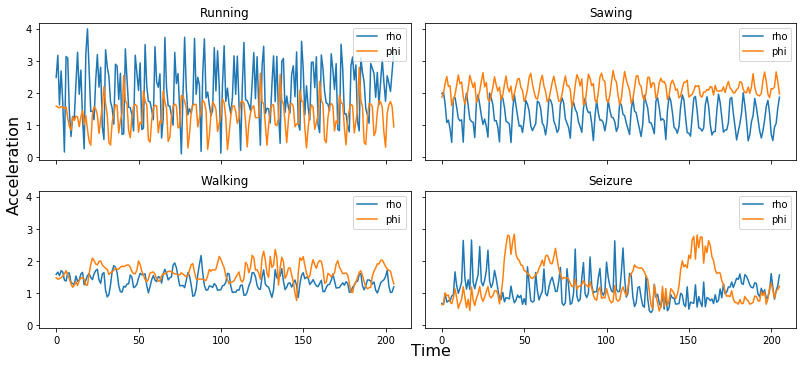

In [118]:
fig, axs = plt.subplots(2,2,figsize=(11,5),sharey=True,sharex=True)

axs[0][0].plot(run[0][:,0], label="rho")
axs[0][0].plot(run[0][:,1], label="phi")
axs[0][0].legend()
axs[0][0].set_title('Running')
axs[1][0].plot(walk[0][:,0], label="rho")
axs[1][0].plot(walk[0][:,1],label="phi")
axs[1][0].legend()
axs[1][0].set_title('Walking')
axs[0][1].plot(saw[0][:,0], label="rho")
axs[0][1].plot(saw[0][:,1], label="phi")
axs[0][1].legend()
axs[0][1].set_title('Sawing')
axs[1][1].plot(ep[0][:,0], label="rho")
axs[1][1].plot(ep[0][:,1], label="phi")
axs[1][1].legend()
axs[1][1].set_title('Seizure')

fig.text(.5,0,'Time',size=16)
fig.text(-.01,.4,'Acceleration',rotation=90,size=16)
plt.tight_layout()

;

In [16]:
#making sure shape is good
rho_phi_3d_2 = rho_phi.reshape(137,206,2)

In [17]:
rho_phi_3d_2[0].shape

(206, 2)

In [18]:
rho_phi_3d_2.shape

(137, 206, 2)

In [19]:
y = train_pd['label_binary'].values

In [20]:
X_train_rhophi, X_vali_rhophi, y_train_rhophi, y_vali_rhophi = train_test_split(rho_phi_3d_2, y, test_size = 0.25, random_state = 666)

In [21]:
X_train_rhophi.shape

(102, 206, 2)

**data is in the right shape. now lets invoke tensor board before we build the model and train**

In [22]:
from keras.callbacks import TensorBoard
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling1D, MaxPool1D, Dropout,Conv1D,MaxPooling2D

In [290]:
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(206,2)))
model1.add(Dropout(0.5))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model1.add(Dropout(0.5))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [498]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 204, 64)           448       
_________________________________________________________________
dropout_12 (Dropout)         (None, 204, 64)           0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 102, 64)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 100, 64)           12352     
_________________________________________________________________
dropout_13 (Dropout)         (None, 100, 64)           0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 50, 64)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)             

In [23]:
metrics1 = ['accuracy','TruePositives', 'TrueNegatives','FalsePositives','FalseNegatives','Precision','Recall']

In [291]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics1)

In [158]:
batch_size=32

In [292]:
tensorboard = TensorBoard(log_dir='./logs8', histogram_freq=2, batch_size=batch_size, write_graph=True, write_grads=True, write_images=True)
model1_hist = model1.fit(X_train_rhophi, y_train_rhophi, batch_size=batch_size, epochs=100, 
          validation_data = (X_vali_rhophi,y_vali_rhophi), callbacks = [tensorboard])

Epoch 1/100
4/4 [==============================] - 2s 424ms/step - loss: 0.7718 - accuracy: 0.5686 - true_positives: 5.0000 - true_negatives: 53.0000 - false_positives: 26.0000 - false_negatives: 18.0000 - precision: 0.1613 - recall: 0.2174 - val_loss: 0.6290 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 30ms/step - loss: 0.5731 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6144 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 64ms

Epoch 17/100
4/4 [==============================] - 0s 53ms/step - loss: 0.4666 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5456 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 18/100
4/4 [==============================] - 0s 32ms/step - loss: 0.4710 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5711 - val_accuracy: 0.8000 - val_true_positives: 4.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 7.0000 - val_precision: 1.0000 - val_recall: 0.3636
Epoch 19/100
4/4 [==============================] - 0s 

4/4 [==============================] - 0s 51ms/step - loss: 0.0498 - accuracy: 0.9902 - true_positives: 23.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 0.0000e+00 - precision: 0.9583 - recall: 1.0000 - val_loss: 0.2354 - val_accuracy: 0.8857 - val_true_positives: 9.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 2.0000 - val_precision: 0.8182 - val_recall: 0.8182
Epoch 54/100
4/4 [==============================] - 0s 33ms/step - loss: 0.0418 - accuracy: 0.9804 - true_positives: 21.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 2.0000 - precision: 1.0000 - recall: 0.9130 - val_loss: 0.2477 - val_accuracy: 0.8857 - val_true_positives: 9.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 2.0000 - val_precision: 0.8182 - val_recall: 0.8182
Epoch 55/100
4/4 [==============================] - 0s 62ms/step - loss: 0.0539 - accuracy: 0.9804 - true_positiv

4/4 [==============================] - 0s 67ms/step - loss: 0.0153 - accuracy: 0.9902 - true_positives: 22.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 1.0000 - precision: 1.0000 - recall: 0.9565 - val_loss: 0.2700 - val_accuracy: 0.8857 - val_true_positives: 9.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 2.0000 - val_precision: 0.8182 - val_recall: 0.8182
Epoch 90/100
4/4 [==============================] - 0s 32ms/step - loss: 0.0039 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2736 - val_accuracy: 0.8857 - val_true_positives: 9.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 2.0000 - val_precision: 0.8182 - val_recall: 0.8182
Epoch 91/100
4/4 [==============================] - 0s 48ms/step - loss: 0.0102 - accuracy: 1.0000 - true_pos

What proportion of actual positives was identified correctly--> RECALL

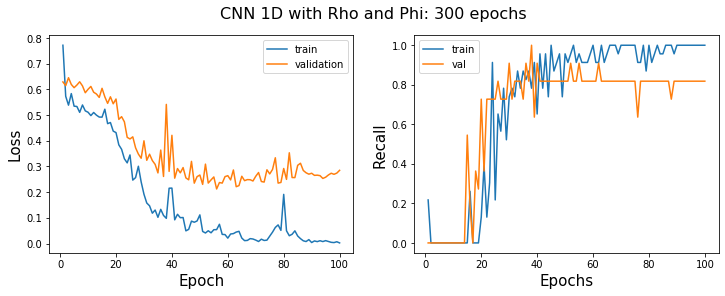

In [446]:
lr_plot(model1_hist,'CNN 1D with Rho and Phi: 300 epochs','lr_plot_model1_rhophi_300epochs3.png')

In [448]:
model1.save('../models/CNN1d.h5')

In [24]:
from scipy import signal

In [65]:
rate = 16 

freqs, times, Sxrho = signal.spectrogram(X_train_rhophi[1][:,0], nperseg=20,noverlap=2) 
freqs, times, Sxphi = signal.spectrogram(X_train_rhophi[1][:,1], nperseg=20,noverlap=2) 

code below is for a visual example of data tranformation

''

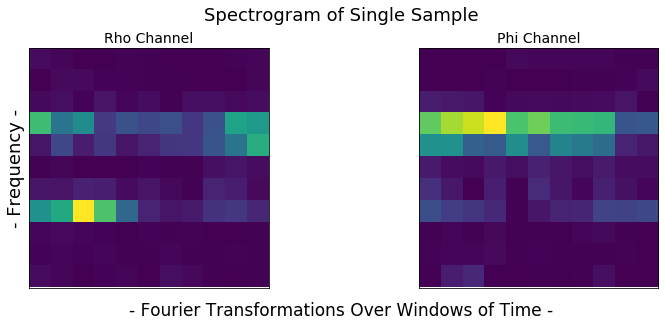

In [134]:
fig, axs = plt.subplots(1,2,figsize=(12,5),sharex=True)
axs[0].imshow(Sxrho)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_ylabel('- Frequency -',size=18)
axs[0].set_title('Rho Channel',size=14)

axs[1].imshow(Sxphi)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title('Phi Channel',size=14)
                  
fig.text(0.5, 0.07, '- Fourier Transformations Over Windows of Time -', ha='center',size=17)
fig.text(0.5, .89, 'Spectrogram of Single Sample', ha='center',size=18)


plt.tight_layout(pad=5)
#plt.savefig('../images/spectrogram_sample2.png')
;

the shape i want is (102,11,11,2) for train and (35,11,11,2)

In [27]:
X_train_rhophi.shape

(102, 206, 2)

In [367]:
X_vali_rhophi.shape

(35, 206, 2)

In [370]:
freqs, times, Sxrho = signal.spectrogram(X_train_rhophi[1][:,0], nperseg=20,noverlap=2) 

In [371]:
freqs, times, Sxphi = signal.spectrogram(X_train_rhophi[1][:,1], nperseg=20,noverlap=2) 

In [375]:
np.dstack((Sxrho,Sxphi)).shape #this with 

(11, 11, 2)

In [31]:
# converting time series data to spectrogram image dataset
X_train_spec = ts_df_to_spectrogram(X_train_rhophi)

In [32]:
X_vali_spec = ts_df_to_spectrogram(X_vali_rhophi)

In [518]:
model2 = Sequential()
model2.add(Conv2D(filters=20, kernel_size=2, activation='relu', input_shape=(11,11,2)))
model2.add(Dropout(0.5))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=20, kernel_size=2, activation='relu'))
model2.add(Dropout(0.5))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(50, activation='relu'))
model2.add(Dense(25, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [484]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 9, 9, 64)          1216      
_________________________________________________________________
dropout_8 (Dropout)          (None, 9, 9, 64)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 64)          36928     
_________________________________________________________________
dropout_9 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [519]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics1)

In [520]:
tensorboard = TensorBoard(log_dir='./logs8', histogram_freq=2, batch_size=32, write_graph=True, write_grads=True, write_images=True)
model2_hist = model2.fit(X_train_spec, y_train_rhophi, batch_size=batch_size, epochs=300, 
          validation_data = (X_vali_spec,y_vali_rhophi), callbacks = [tensorboard])

Epoch 1/300
4/4 [==============================] - 1s 179ms/step - loss: 0.5835 - accuracy: 0.7843 - true_positives: 1.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 22.0000 - precision: 1.0000 - recall: 0.0435 - val_loss: 0.6273 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5266 - accuracy: 0.7843 - true_positives: 1.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 22.0000 - precision: 1.0000 - recall: 0.0435 - val_loss: 0.6244 - val_accuracy: 0.7143 - val_true_positives: 1.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 10.0000 - val_precision: 1.0000 - val_recall: 0.0909
Epoch 3/300
4/4 [==============================] - 0s 11ms/step - loss: 0.4786 

Epoch 18/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1768 - accuracy: 0.9412 - true_positives: 18.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 5.0000 - precision: 0.9474 - recall: 0.7826 - val_loss: 0.6695 - val_accuracy: 0.6857 - val_true_positives: 3.0000 - val_true_negatives: 21.0000 - val_false_positives: 3.0000 - val_false_negatives: 8.0000 - val_precision: 0.5000 - val_recall: 0.2727
Epoch 19/300
4/4 [==============================] - 0s 13ms/step - loss: 0.2414 - accuracy: 0.9118 - true_positives: 17.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 6.0000 - precision: 0.8500 - recall: 0.7391 - val_loss: 0.6742 - val_accuracy: 0.6571 - val_true_positives: 3.0000 - val_true_negatives: 20.0000 - val_false_positives: 4.0000 - val_false_negatives: 8.0000 - val_precision: 0.4286 - val_recall: 0.2727
Epoch 20/300
4/4 [==============================] - 0s 11ms/step - loss: 0.1516 - accuracy: 0.9412 - true_po

4/4 [==============================] - 0s 8ms/step - loss: 0.1620 - accuracy: 0.9314 - true_positives: 22.0000 - true_negatives: 73.0000 - false_positives: 6.0000 - false_negatives: 1.0000 - precision: 0.7857 - recall: 0.9565 - val_loss: 0.8199 - val_accuracy: 0.6000 - val_true_positives: 3.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 8.0000 - val_precision: 0.3333 - val_recall: 0.2727
Epoch 55/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1623 - accuracy: 0.9216 - true_positives: 20.0000 - true_negatives: 74.0000 - false_positives: 5.0000 - false_negatives: 3.0000 - precision: 0.8000 - recall: 0.8696 - val_loss: 0.7961 - val_accuracy: 0.6000 - val_true_positives: 3.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 8.0000 - val_precision: 0.3333 - val_recall: 0.2727
Epoch 56/300
4/4 [==============================] - 0s 8ms/step - loss: 0.0823 - accuracy: 0.9902 - true_positives: 22.000

4/4 [==============================] - 0s 7ms/step - loss: 0.0922 - accuracy: 0.9510 - true_positives: 22.0000 - true_negatives: 75.0000 - false_positives: 4.0000 - false_negatives: 1.0000 - precision: 0.8462 - recall: 0.9565 - val_loss: 1.1239 - val_accuracy: 0.6000 - val_true_positives: 3.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 8.0000 - val_precision: 0.3333 - val_recall: 0.2727
Epoch 91/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1308 - accuracy: 0.9510 - true_positives: 19.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 4.0000 - precision: 0.9500 - recall: 0.8261 - val_loss: 1.1213 - val_accuracy: 0.6000 - val_true_positives: 3.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 8.0000 - val_precision: 0.3333 - val_recall: 0.2727
Epoch 92/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0954 - accuracy: 0.9706 - true_positives: 22.000

4/4 [==============================] - 0s 10ms/step - loss: 0.0648 - accuracy: 0.9706 - true_positives: 20.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 3.0000 - precision: 1.0000 - recall: 0.8696 - val_loss: 1.3485 - val_accuracy: 0.6000 - val_true_positives: 3.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 8.0000 - val_precision: 0.3333 - val_recall: 0.2727
Epoch 127/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1474 - accuracy: 0.9804 - true_positives: 21.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 2.0000 - precision: 1.0000 - recall: 0.9130 - val_loss: 1.2813 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 128/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0781 - accuracy: 0.9608 - true_positi

4/4 [==============================] - 0s 8ms/step - loss: 0.0631 - accuracy: 0.9706 - true_positives: 22.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 1.0000 - precision: 0.9167 - recall: 0.9565 - val_loss: 1.6193 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 163/300
4/4 [==============================] - 0s 11ms/step - loss: 0.0286 - accuracy: 0.9902 - true_positives: 23.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 0.0000e+00 - precision: 0.9583 - recall: 1.0000 - val_loss: 1.6728 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 164/300
4/4 [==============================] - 0s 8ms/step - loss: 0.0474 - accuracy: 0.9804 - true_positives: 

4/4 [==============================] - 0s 8ms/step - loss: 0.0243 - accuracy: 0.9902 - true_positives: 22.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 1.0000 - precision: 1.0000 - recall: 0.9565 - val_loss: 1.8046 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 199/300
4/4 [==============================] - 0s 10ms/step - loss: 0.0390 - accuracy: 0.9804 - true_positives: 22.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 1.0000 - precision: 0.9565 - recall: 0.9565 - val_loss: 1.8158 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 200/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0314 - accuracy: 0.9902 - true_positives: 

4/4 [==============================] - 0s 7ms/step - loss: 0.0086 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.0337 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 235/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0173 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.0528 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 236/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0143 - accuracy: 1.0000 - true_

4/4 [==============================] - 0s 8ms/step - loss: 0.0106 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.1259 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 271/300
4/4 [==============================] - 0s 10ms/step - loss: 0.0257 - accuracy: 0.9902 - true_positives: 23.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 0.0000e+00 - precision: 0.9583 - recall: 1.0000 - val_loss: 2.1486 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 272/300
4/4 [==============================] - 0s 8ms/step - loss: 0.0198 - accuracy: 0.9902 - true_pos

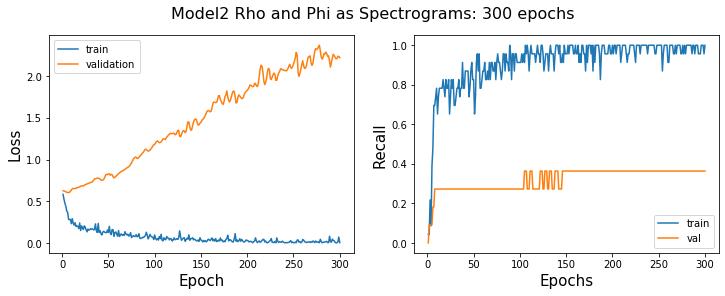

In [521]:
lr_plot(model2_hist,'Model2 Rho and Phi as Spectrograms: 300 epochs','model2_specs_300_3.png')

lets try an make this better

**First I will try and switch my max pooling to happen before drop out.**

In [523]:
model3 = Sequential()
model3.add(Conv2D(filters=20, kernel_size=2, activation='relu', input_shape=(11,11,2)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.5))
model3.add(Conv2D(filters=20, kernel_size=2, activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.5))
model3.add(Flatten())
model3.add(Dense(50, activation='relu'))
model3.add(Dense(25, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [524]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics1)

In [525]:
tensorboard = TensorBoard(log_dir='./logs9', histogram_freq=2, batch_size=32, write_graph=True, write_grads=True, write_images=True)
model3_hist = model3.fit(X_train_spec, y_train_rhophi, batch_size=batch_size, epochs=300, 
          validation_data = (X_vali_spec,y_vali_rhophi), callbacks = [tensorboard])

Epoch 1/300
4/4 [==============================] - 1s 188ms/step - loss: 0.6670 - accuracy: 0.5196 - true_positives: 14.0000 - true_negatives: 39.0000 - false_positives: 40.0000 - false_negatives: 9.0000 - precision: 0.2593 - recall: 0.6087 - val_loss: 0.6279 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/300
4/4 [==============================] - 0s 7ms/step - loss: 0.6234 - accuracy: 0.7157 - true_positives: 7.0000 - true_negatives: 66.0000 - false_positives: 13.0000 - false_negatives: 16.0000 - precision: 0.3500 - recall: 0.3043 - val_loss: 0.5994 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/300
4/4 [==============================] - 0s 10ms/step - loss: 0.

Epoch 18/300
4/4 [==============================] - 0s 9ms/step - loss: 0.3407 - accuracy: 0.8824 - true_positives: 12.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 11.0000 - precision: 0.9231 - recall: 0.5217 - val_loss: 0.6997 - val_accuracy: 0.6000 - val_true_positives: 2.0000 - val_true_negatives: 19.0000 - val_false_positives: 5.0000 - val_false_negatives: 9.0000 - val_precision: 0.2857 - val_recall: 0.1818
Epoch 19/300
4/4 [==============================] - 0s 13ms/step - loss: 0.3304 - accuracy: 0.8725 - true_positives: 14.0000 - true_negatives: 75.0000 - false_positives: 4.0000 - false_negatives: 9.0000 - precision: 0.7778 - recall: 0.6087 - val_loss: 0.7104 - val_accuracy: 0.6000 - val_true_positives: 2.0000 - val_true_negatives: 19.0000 - val_false_positives: 5.0000 - val_false_negatives: 9.0000 - val_precision: 0.2857 - val_recall: 0.1818
Epoch 20/300
4/4 [==============================] - 0s 9ms/step - loss: 0.3537 - accuracy: 0.8529 - true_pos

4/4 [==============================] - 0s 7ms/step - loss: 0.2502 - accuracy: 0.8824 - true_positives: 16.0000 - true_negatives: 74.0000 - false_positives: 5.0000 - false_negatives: 7.0000 - precision: 0.7619 - recall: 0.6957 - val_loss: 0.7951 - val_accuracy: 0.6857 - val_true_positives: 3.0000 - val_true_negatives: 21.0000 - val_false_positives: 3.0000 - val_false_negatives: 8.0000 - val_precision: 0.5000 - val_recall: 0.2727
Epoch 55/300
4/4 [==============================] - 0s 8ms/step - loss: 0.2382 - accuracy: 0.9510 - true_positives: 19.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 4.0000 - precision: 0.9500 - recall: 0.8261 - val_loss: 0.7970 - val_accuracy: 0.6857 - val_true_positives: 3.0000 - val_true_negatives: 21.0000 - val_false_positives: 3.0000 - val_false_negatives: 8.0000 - val_precision: 0.5000 - val_recall: 0.2727
Epoch 56/300
4/4 [==============================] - 0s 7ms/step - loss: 0.2879 - accuracy: 0.8922 - true_positives: 16.0000

4/4 [==============================] - 0s 8ms/step - loss: 0.2212 - accuracy: 0.9020 - true_positives: 17.0000 - true_negatives: 75.0000 - false_positives: 4.0000 - false_negatives: 6.0000 - precision: 0.8095 - recall: 0.7391 - val_loss: 0.9557 - val_accuracy: 0.6857 - val_true_positives: 3.0000 - val_true_negatives: 21.0000 - val_false_positives: 3.0000 - val_false_negatives: 8.0000 - val_precision: 0.5000 - val_recall: 0.2727
Epoch 91/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2323 - accuracy: 0.8922 - true_positives: 18.0000 - true_negatives: 73.0000 - false_positives: 6.0000 - false_negatives: 5.0000 - precision: 0.7500 - recall: 0.7826 - val_loss: 0.9550 - val_accuracy: 0.6857 - val_true_positives: 3.0000 - val_true_negatives: 21.0000 - val_false_positives: 3.0000 - val_false_negatives: 8.0000 - val_precision: 0.5000 - val_recall: 0.2727
Epoch 92/300
4/4 [==============================] - 0s 8ms/step - loss: 0.2599 - accuracy: 0.9020 - true_positives: 16.000

4/4 [==============================] - 0s 7ms/step - loss: 0.1243 - accuracy: 0.9314 - true_positives: 19.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 4.0000 - precision: 0.8636 - recall: 0.8261 - val_loss: 1.0784 - val_accuracy: 0.6571 - val_true_positives: 3.0000 - val_true_negatives: 20.0000 - val_false_positives: 4.0000 - val_false_negatives: 8.0000 - val_precision: 0.4286 - val_recall: 0.2727
Epoch 127/300
4/4 [==============================] - 0s 9ms/step - loss: 0.1539 - accuracy: 0.9314 - true_positives: 18.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 5.0000 - precision: 0.9000 - recall: 0.7826 - val_loss: 1.0899 - val_accuracy: 0.6857 - val_true_positives: 3.0000 - val_true_negatives: 21.0000 - val_false_positives: 3.0000 - val_false_negatives: 8.0000 - val_precision: 0.5000 - val_recall: 0.2727
Epoch 128/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1497 - accuracy: 0.9118 - true_positives: 18.00

4/4 [==============================] - 0s 8ms/step - loss: 0.1258 - accuracy: 0.9412 - true_positives: 20.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 3.0000 - precision: 0.8696 - recall: 0.8696 - val_loss: 1.2722 - val_accuracy: 0.6000 - val_true_positives: 3.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 8.0000 - val_precision: 0.3333 - val_recall: 0.2727
Epoch 163/300
4/4 [==============================] - 0s 9ms/step - loss: 0.1457 - accuracy: 0.9314 - true_positives: 18.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 5.0000 - precision: 0.9000 - recall: 0.7826 - val_loss: 1.2882 - val_accuracy: 0.6286 - val_true_positives: 3.0000 - val_true_negatives: 19.0000 - val_false_positives: 5.0000 - val_false_negatives: 8.0000 - val_precision: 0.3750 - val_recall: 0.2727
Epoch 164/300
4/4 [==============================] - 0s 8ms/step - loss: 0.1230 - accuracy: 0.9510 - true_positives: 19.00

4/4 [==============================] - 0s 9ms/step - loss: 0.1467 - accuracy: 0.9608 - true_positives: 20.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 3.0000 - precision: 0.9524 - recall: 0.8696 - val_loss: 1.4871 - val_accuracy: 0.6000 - val_true_positives: 3.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 8.0000 - val_precision: 0.3333 - val_recall: 0.2727
Epoch 199/300
4/4 [==============================] - 0s 10ms/step - loss: 0.0927 - accuracy: 0.9608 - true_positives: 19.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 4.0000 - precision: 1.0000 - recall: 0.8261 - val_loss: 1.4940 - val_accuracy: 0.6000 - val_true_positives: 3.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 8.0000 - val_precision: 0.3333 - val_recall: 0.2727
Epoch 200/300
4/4 [==============================] - 0s 8ms/step - loss: 0.1233 - accuracy: 0.9314 - true_positives: 

4/4 [==============================] - 0s 8ms/step - loss: 0.1314 - accuracy: 0.9314 - true_positives: 21.0000 - true_negatives: 74.0000 - false_positives: 5.0000 - false_negatives: 2.0000 - precision: 0.8077 - recall: 0.9130 - val_loss: 1.8057 - val_accuracy: 0.6000 - val_true_positives: 3.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 8.0000 - val_precision: 0.3333 - val_recall: 0.2727
Epoch 235/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1105 - accuracy: 0.9314 - true_positives: 19.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 4.0000 - precision: 0.8636 - recall: 0.8261 - val_loss: 1.8114 - val_accuracy: 0.6000 - val_true_positives: 3.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 8.0000 - val_precision: 0.3333 - val_recall: 0.2727
Epoch 236/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0818 - accuracy: 0.9706 - true_positives: 20.0

4/4 [==============================] - 0s 7ms/step - loss: 0.0566 - accuracy: 0.9804 - true_positives: 22.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 1.0000 - precision: 0.9565 - recall: 0.9565 - val_loss: 1.9255 - val_accuracy: 0.6000 - val_true_positives: 3.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 8.0000 - val_precision: 0.3333 - val_recall: 0.2727
Epoch 271/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0485 - accuracy: 0.9804 - true_positives: 22.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 1.0000 - precision: 0.9565 - recall: 0.9565 - val_loss: 1.9407 - val_accuracy: 0.6000 - val_true_positives: 3.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 8.0000 - val_precision: 0.3333 - val_recall: 0.2727
Epoch 272/300
4/4 [==============================] - 0s 8ms/step - loss: 0.0918 - accuracy: 0.9510 - true_positives: 21.00

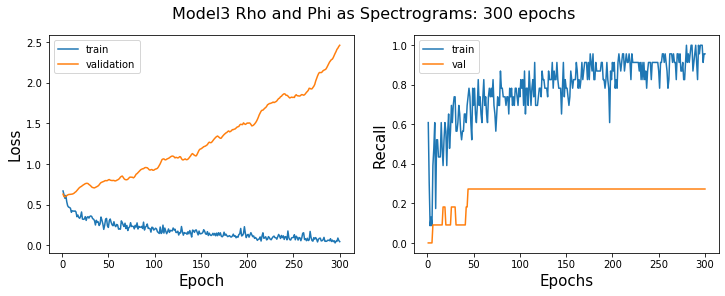

In [526]:
lr_plot(model3_hist,'Model3 Rho and Phi as Spectrograms: 300 epochs','model2_specs_300_switch3.png')

**that seemed to make it worse so i am going to switch those back around.**

In [527]:
model4 = Sequential()
model4.add(Conv2D(filters=20, kernel_size=(3,3), activation='relu', input_shape=(11,11,2)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.5))
model4.add(Conv2D(filters=20, kernel_size=(3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.5))
model4.add(Flatten())
model4.add(Dense(50, activation='relu'))
model4.add(Dense(25, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

In [528]:
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics1)

In [529]:
tensorboard = TensorBoard(log_dir='./logs10', histogram_freq=2, batch_size=32, write_graph=True, write_grads=True, write_images=True)
model4_hist = model4.fit(X_train_spec, y_train_rhophi, batch_size=batch_size, epochs=300, 
          validation_data = (X_vali_spec,y_vali_rhophi), callbacks = [tensorboard])

Epoch 1/300
4/4 [==============================] - 1s 190ms/step - loss: 0.6043 - accuracy: 0.7353 - true_positives: 4.0000 - true_negatives: 71.0000 - false_positives: 8.0000 - false_negatives: 19.0000 - precision: 0.3333 - recall: 0.1739 - val_loss: 0.6342 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5878 - accuracy: 0.7647 - true_positives: 1.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 22.0000 - precision: 0.3333 - recall: 0.0435 - val_loss: 0.6126 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/300
4/4 [==============================] - 0s 13ms/step - loss: 0.5

4/4 [==============================] - 0s 9ms/step - loss: 0.2742 - accuracy: 0.8725 - true_positives: 14.0000 - true_negatives: 75.0000 - false_positives: 4.0000 - false_negatives: 9.0000 - precision: 0.7778 - recall: 0.6087 - val_loss: 0.8839 - val_accuracy: 0.6571 - val_true_positives: 4.0000 - val_true_negatives: 19.0000 - val_false_positives: 5.0000 - val_false_negatives: 7.0000 - val_precision: 0.4444 - val_recall: 0.3636
Epoch 36/300
4/4 [==============================] - 0s 9ms/step - loss: 0.2518 - accuracy: 0.8922 - true_positives: 14.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 9.0000 - precision: 0.8750 - recall: 0.6087 - val_loss: 0.8930 - val_accuracy: 0.6571 - val_true_positives: 4.0000 - val_true_negatives: 19.0000 - val_false_positives: 5.0000 - val_false_negatives: 7.0000 - val_precision: 0.4444 - val_recall: 0.3636
Epoch 37/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2399 - accuracy: 0.9020 - true_positives: 15.000

4/4 [==============================] - 0s 9ms/step - loss: 0.1940 - accuracy: 0.9216 - true_positives: 18.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 5.0000 - precision: 0.8571 - recall: 0.7826 - val_loss: 1.1423 - val_accuracy: 0.6857 - val_true_positives: 3.0000 - val_true_negatives: 21.0000 - val_false_positives: 3.0000 - val_false_negatives: 8.0000 - val_precision: 0.5000 - val_recall: 0.2727
Epoch 72/300
4/4 [==============================] - 0s 9ms/step - loss: 0.1784 - accuracy: 0.9510 - true_positives: 18.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 5.0000 - precision: 1.0000 - recall: 0.7826 - val_loss: 1.1428 - val_accuracy: 0.6857 - val_true_positives: 3.0000 - val_true_negatives: 21.0000 - val_false_positives: 3.0000 - val_false_negatives: 8.0000 - val_precision: 0.5000 - val_recall: 0.2727
Epoch 73/300
4/4 [==============================] - 0s 11ms/step - loss: 0.2200 - accuracy: 0.8725 - true_positives: 15

4/4 [==============================] - 0s 12ms/step - loss: 0.1135 - accuracy: 0.9314 - true_positives: 22.0000 - true_negatives: 73.0000 - false_positives: 6.0000 - false_negatives: 1.0000 - precision: 0.7857 - recall: 0.9565 - val_loss: 1.5227 - val_accuracy: 0.6000 - val_true_positives: 3.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 8.0000 - val_precision: 0.3333 - val_recall: 0.2727
Epoch 108/300
4/4 [==============================] - 0s 9ms/step - loss: 0.1036 - accuracy: 0.9510 - true_positives: 21.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 2.0000 - precision: 0.8750 - recall: 0.9130 - val_loss: 1.5518 - val_accuracy: 0.6000 - val_true_positives: 3.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 8.0000 - val_precision: 0.3333 - val_recall: 0.2727
Epoch 109/300
4/4 [==============================] - 0s 11ms/step - loss: 0.1183 - accuracy: 0.9412 - true_positives: 20.

4/4 [==============================] - 0s 11ms/step - loss: 0.0994 - accuracy: 0.9510 - true_positives: 19.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 4.0000 - precision: 0.9500 - recall: 0.8261 - val_loss: 1.9606 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 144/300
4/4 [==============================] - 0s 9ms/step - loss: 0.1169 - accuracy: 0.9608 - true_positives: 21.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 2.0000 - precision: 0.9130 - recall: 0.9130 - val_loss: 1.9723 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 145/300
4/4 [==============================] - 0s 11ms/step - loss: 0.0683 - accuracy: 0.9608 - true_positives: 21.

4/4 [==============================] - 0s 12ms/step - loss: 0.0697 - accuracy: 0.9706 - true_positives: 23.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 0.0000e+00 - precision: 0.8846 - recall: 1.0000 - val_loss: 2.3403 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 180/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0893 - accuracy: 0.9510 - true_positives: 21.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 2.0000 - precision: 0.8750 - recall: 0.9130 - val_loss: 2.3981 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 181/300
4/4 [==============================] - 0s 10ms/step - loss: 0.0613 - accuracy: 0.9804 - true_positives:

4/4 [==============================] - 0s 11ms/step - loss: 0.0526 - accuracy: 0.9706 - true_positives: 23.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 0.0000e+00 - precision: 0.8846 - recall: 1.0000 - val_loss: 2.7609 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 216/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0401 - accuracy: 0.9804 - true_positives: 23.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 0.0000e+00 - precision: 0.9200 - recall: 1.0000 - val_loss: 2.8199 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 217/300
4/4 [==============================] - 0s 9ms/step - loss: 0.1045 - accuracy: 0.9706 - true_positiv

4/4 [==============================] - 0s 11ms/step - loss: 0.0311 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.6196 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 252/300
4/4 [==============================] - 0s 10ms/step - loss: 0.0478 - accuracy: 0.9902 - true_positives: 23.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 0.0000e+00 - precision: 0.9583 - recall: 1.0000 - val_loss: 2.6416 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 253/300
4/4 [==============================] - 0s 15ms/step - loss: 0.0858 - accuracy: 0.9706 - true_p

4/4 [==============================] - 0s 11ms/step - loss: 0.0210 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.3314 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 288/300
4/4 [==============================] - 0s 11ms/step - loss: 0.0989 - accuracy: 0.9706 - true_positives: 22.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 1.0000 - precision: 0.9167 - recall: 0.9565 - val_loss: 3.3277 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 289/300
4/4 [==============================] - 0s 11ms/step - loss: 0.0436 - accuracy: 0.9902 - true_posit

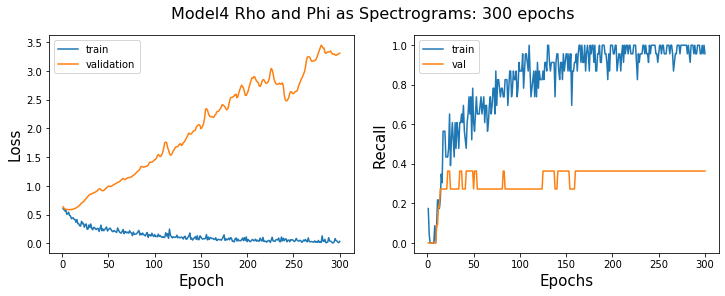

In [530]:
lr_plot(model4_hist,'Model4 Rho and Phi as Spectrograms: 300 epochs','model4_specs_300.png')

**Lets go deeper**
BEcasue my images are so small I cant do  max pool at every layer so i changed it up to have 3 conv layers then one max popling at the end. 

In [48]:
model_deeper1 = Sequential()
model_deeper1.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(11,11,2)))
#model_deeper1.add(MaxPooling2D(pool_size=(2,2)))
model_deeper1.add(Dropout(0.5))
model_deeper1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
#model_deeper1.add(MaxPooling2D(pool_size=(2,2)))
model_deeper1.add(Dropout(0.5))
model_deeper1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
#model_deeper1.add(MaxPooling2D(pool_size=(2,2)))
model_deeper1.add(Dropout(0.5))
model_deeper1.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model_deeper1.add(MaxPooling2D(pool_size=(2,2)))
model_deeper1.add(Dropout(0.5))
model_deeper1.add(Flatten())
#mode_deeper1.add(Dense(, activation='relu'))
model_deeper1.add(Dense(100, activation='relu'))
model_deeper1.add(Dense(1, activation='sigmoid'))

In [49]:
model_deeper1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 9, 9, 16)          304       
_________________________________________________________________
dropout_21 (Dropout)         (None, 9, 9, 16)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
dropout_22 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 5, 5, 64)          18496     
_________________________________________________________________
dropout_23 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 3, 3, 128)       

T**this doubled the amount of trainable parameter lets see if this helped.**

In [52]:
model_deeper1.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics1)

In [54]:
tensorboard = TensorBoard(log_dir='./logs_deeper1', histogram_freq=2, batch_size=32, write_graph=True, write_grads=True, write_images=True)
model_deeper1_hist = model_deeper1.fit(X_train_spec, y_train_rhophi, batch_size=32, epochs=300, 
          validation_data = (X_vali_spec,y_vali_rhophi), callbacks = [tensorboard])

Epoch 1/300
1/4 [======>.......................] - ETA: 0s - loss: 0.6328 - accuracy: 0.7812 - true_positives: 0.0000e+00 - true_negatives: 25.0000 - false_positives: 0.0000e+00 - false_negatives: 7.0000 - precision: 0.0000e+00 - recall: 0.0000e+00WARNING:tensorflow:From /home/rachel/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
4/4 [==============================] - 1s 172ms/step - loss: 0.6519 - accuracy: 0.7843 - true_positives: 1.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 22.0000 - precision: 1.0000 - recall: 0.0435 - val_loss: 0.6311 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2

4/4 [==============================] - 0s 11ms/step - loss: 0.1747 - accuracy: 0.9314 - true_positives: 20.0000 - true_negatives: 75.0000 - false_positives: 4.0000 - false_negatives: 3.0000 - precision: 0.8333 - recall: 0.8696 - val_loss: 1.2977 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 36/300
4/4 [==============================] - 0s 8ms/step - loss: 0.1571 - accuracy: 0.9118 - true_positives: 17.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 6.0000 - precision: 0.8500 - recall: 0.7391 - val_loss: 1.3811 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 37/300
4/4 [==============================] - 0s 26ms/step - loss: 0.1599 - accuracy: 0.9020 - true_positives: 14.00

4/4 [==============================] - 0s 18ms/step - loss: 0.1477 - accuracy: 0.9412 - true_positives: 23.0000 - true_negatives: 73.0000 - false_positives: 6.0000 - false_negatives: 0.0000e+00 - precision: 0.7931 - recall: 1.0000 - val_loss: 1.7293 - val_accuracy: 0.5714 - val_true_positives: 5.0000 - val_true_negatives: 15.0000 - val_false_positives: 9.0000 - val_false_negatives: 6.0000 - val_precision: 0.3571 - val_recall: 0.4545
Epoch 72/300
4/4 [==============================] - 0s 11ms/step - loss: 0.0951 - accuracy: 0.9706 - true_positives: 23.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 0.0000e+00 - precision: 0.8846 - recall: 1.0000 - val_loss: 1.8471 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 73/300
4/4 [==============================] - 0s 13ms/step - loss: 0.1311 - accuracy: 0.9314 - true_positiv

4/4 [==============================] - 0s 12ms/step - loss: 0.1661 - accuracy: 0.9608 - true_positives: 22.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 1.0000 - precision: 0.8800 - recall: 0.9565 - val_loss: 2.3122 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 108/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0579 - accuracy: 0.9902 - true_positives: 23.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 0.0000e+00 - precision: 0.9583 - recall: 1.0000 - val_loss: 2.2227 - val_accuracy: 0.6000 - val_true_positives: 4.0000 - val_true_negatives: 17.0000 - val_false_positives: 7.0000 - val_false_negatives: 7.0000 - val_precision: 0.3636 - val_recall: 0.3636
Epoch 109/300
4/4 [==============================] - 0s 11ms/step - loss: 0.1106 - accuracy: 0.9510 - true_positives:

Epoch 125/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0798 - accuracy: 0.9706 - true_positives: 22.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 1.0000 - precision: 0.9167 - recall: 0.9565 - val_loss: 2.1696 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 126/300
4/4 [==============================] - 0s 10ms/step - loss: 0.0373 - accuracy: 0.9902 - true_positives: 23.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 0.0000e+00 - precision: 0.9583 - recall: 1.0000 - val_loss: 2.1612 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 127/300
4/4 [==============================] - 0s 31ms/step - loss: 0.0465 - accuracy: 0.9902 - 

4/4 [==============================] - 0s 12ms/step - loss: 0.0131 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.7678 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 162/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0252 - accuracy: 0.9902 - true_positives: 23.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 0.0000e+00 - precision: 0.9583 - recall: 1.0000 - val_loss: 3.8346 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 163/300
4/4 [==============================] - 0s 12ms/step - loss: 0.0388 - accuracy: 0.9902 - true_po

4/4 [==============================] - 0s 12ms/step - loss: 0.0186 - accuracy: 0.9902 - true_positives: 23.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 0.0000e+00 - precision: 0.9583 - recall: 1.0000 - val_loss: 4.5258 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 198/300
4/4 [==============================] - 0s 8ms/step - loss: 0.0279 - accuracy: 0.9902 - true_positives: 22.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 1.0000 - precision: 1.0000 - recall: 0.9565 - val_loss: 4.5722 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 199/300
4/4 [==============================] - 0s 11ms/step - loss: 0.0298 - accuracy: 0.9902 - true_positi

4/4 [==============================] - 0s 13ms/step - loss: 0.2844 - accuracy: 0.9706 - true_positives: 20.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 3.0000 - precision: 1.0000 - recall: 0.8696 - val_loss: 4.6113 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 234/300
4/4 [==============================] - 0s 10ms/step - loss: 0.0140 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 4.3495 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 235/300
4/4 [==============================] - 0s 13ms/step - loss: 0.0139 - accuracy: 1.0000 - true_p

4/4 [==============================] - 0s 12ms/step - loss: 0.0163 - accuracy: 0.9902 - true_positives: 22.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 1.0000 - precision: 1.0000 - recall: 0.9565 - val_loss: 5.4060 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 270/300
4/4 [==============================] - 0s 8ms/step - loss: 0.3348 - accuracy: 0.9510 - true_positives: 18.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 5.0000 - precision: 1.0000 - recall: 0.7826 - val_loss: 4.9119 - val_accuracy: 0.6286 - val_true_positives: 4.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 7.0000 - val_precision: 0.4000 - val_recall: 0.3636
Epoch 271/300
4/4 [==============================] - 0s 12ms/step - loss: 0.0251 - accuracy: 0.9804 - true_positi

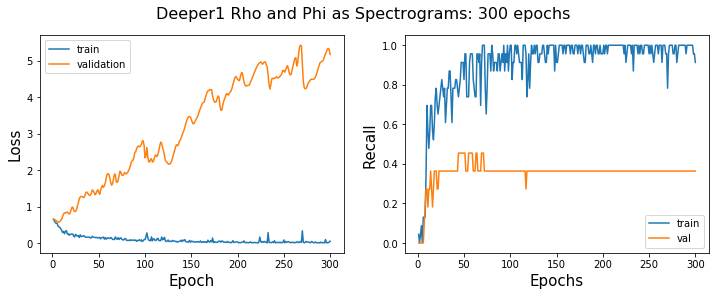

In [55]:
lr_plot(model_deeper1_hist,'Deeper1 Rho and Phi as Spectrograms: 300 epochs','model_deeper1_specs_300.png')

the loss side of this has become worse. maybe going deeper is not the direction I want to go. with out being able to look at the archetecture and data transformation into 2d from  Jiang and Yin (2015) I dont know how to make this better with out impirically tring differnt architecture. The problem may be that my spectrograms are so small that there isnt enough information for the the netweork to pick up on. 

**Lets Try LSTM**

In [275]:

model_LSTM1 = keras.Sequential()
model_LSTM1.add(keras.layers.LSTM(32, input_shape=(206, 2), return_sequences=True))
model_LSTM1.add(keras.layers.LSTM(32, return_sequences=False))
model_LSTM1.add(keras.layers.Dense(1, activation='sigmoid'))
model_LSTM1.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=metrics1)

In [277]:
model_LSTM1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 206, 32)           4480      
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 12,833
Trainable params: 12,833
Non-trainable params: 0
_________________________________________________________________


In [25]:
X_train_rhophi.shape, X_vali_rhophi.shape, y_train_rhophi.shape, y_vali_rhophi.shape

((102, 206, 2), (35, 206, 2), (102,), (35,))

In [147]:
LSTM1_hist = model_LSTM1.fit(X_train_rhophi,y_train_rhophi, epochs=300, validation_data=(X_vali_rhophi,y_vali_rhophi))

Epoch 1/300
4/4 [==============================] - 1s 347ms/step - loss: 0.7041 - accuracy: 0.4020 - true_positives: 12.0000 - true_negatives: 29.0000 - false_positives: 50.0000 - false_negatives: 11.0000 - precision: 0.1935 - recall: 0.5217 - val_loss: 0.6462 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/300
4/4 [==============================] - 0s 88ms/step - loss: 0.5958 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6278 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/300
4/4 [==============================] - 0s 85m

4/4 [==============================] - 0s 83ms/step - loss: 0.5313 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6477 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 36/300
4/4 [==============================] - 0s 82ms/step - loss: 0.5310 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6472 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 37/300
4/4 [==============================] - 0s 

4/4 [==============================] - 0s 89ms/step - loss: 0.5260 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6716 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 70/300
4/4 [==============================] - 0s 87ms/step - loss: 0.5281 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6818 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 71/300
4/4 [==============================] - 0s 

Epoch 104/300
4/4 [==============================] - 0s 107ms/step - loss: 0.5326 - accuracy: 0.7941 - true_positives: 10.0000 - true_negatives: 71.0000 - false_positives: 8.0000 - false_negatives: 13.0000 - precision: 0.5556 - recall: 0.4348 - val_loss: 0.7000 - val_accuracy: 0.6571 - val_true_positives: 1.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 10.0000 - val_precision: 0.3333 - val_recall: 0.0909
Epoch 105/300
4/4 [==============================] - 0s 94ms/step - loss: 0.5045 - accuracy: 0.7941 - true_positives: 5.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 18.0000 - precision: 0.6250 - recall: 0.2174 - val_loss: 0.6738 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 106/300
4/4 [==============================] - 0s 91ms/step - loss: 0.4919 - accuracy: 0.7843 - 

4/4 [==============================] - 0s 90ms/step - loss: 0.4369 - accuracy: 0.8333 - true_positives: 10.0000 - true_negatives: 75.0000 - false_positives: 4.0000 - false_negatives: 13.0000 - precision: 0.7143 - recall: 0.4348 - val_loss: 0.4867 - val_accuracy: 0.7143 - val_true_positives: 3.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 8.0000 - val_precision: 0.6000 - val_recall: 0.2727
Epoch 141/300
4/4 [==============================] - 0s 88ms/step - loss: 0.4292 - accuracy: 0.8333 - true_positives: 9.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 14.0000 - precision: 0.7500 - recall: 0.3913 - val_loss: 0.4354 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 142/300
4/4 [==============================] - 0s 88ms/step - loss: 0.4146 - accuracy: 0.8235 - true_positives: 

Epoch 176/300
4/4 [==============================] - 0s 88ms/step - loss: 0.4695 - accuracy: 0.8137 - true_positives: 4.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 19.0000 - precision: 1.0000 - recall: 0.1739 - val_loss: 0.7075 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 177/300
4/4 [==============================] - 0s 88ms/step - loss: 0.4652 - accuracy: 0.8137 - true_positives: 4.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 19.0000 - precision: 1.0000 - recall: 0.1739 - val_loss: 0.7000 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 178/300
4/4 [==============================] - 0s 87ms/step - loss

Epoch 194/300
4/4 [==============================] - 0s 90ms/step - loss: 0.4134 - accuracy: 0.8431 - true_positives: 7.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 16.0000 - precision: 1.0000 - recall: 0.3043 - val_loss: 0.6893 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 195/300
4/4 [==============================] - 0s 88ms/step - loss: 0.4039 - accuracy: 0.8431 - true_positives: 8.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 15.0000 - precision: 0.8889 - recall: 0.3478 - val_loss: 0.6792 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 196/300
4/4 [==============================] - 0s 88ms/step - loss: 0.4029 - accuracy: 0.8431 -

4/4 [==============================] - 0s 87ms/step - loss: 0.5026 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6099 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 213/300
4/4 [==============================] - 0s 90ms/step - loss: 0.5009 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5954 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 214/300
4/4 [==============================] - 0

Epoch 247/300
4/4 [==============================] - 0s 87ms/step - loss: 0.4548 - accuracy: 0.8235 - true_positives: 6.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 17.0000 - precision: 0.8571 - recall: 0.2609 - val_loss: 0.6649 - val_accuracy: 0.6286 - val_true_positives: 0.0000e+00 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 248/300
4/4 [==============================] - 0s 89ms/step - loss: 0.4455 - accuracy: 0.8235 - true_positives: 6.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 17.0000 - precision: 0.8571 - recall: 0.2609 - val_loss: 0.6768 - val_accuracy: 0.6286 - val_true_positives: 0.0000e+00 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 249/300
4/4 [==============================] - 0s 87ms/step - loss: 0.4340

Epoch 265/300
4/4 [==============================] - 0s 89ms/step - loss: 0.4125 - accuracy: 0.8529 - true_positives: 9.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 14.0000 - precision: 0.9000 - recall: 0.3913 - val_loss: 0.6670 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 266/300
4/4 [==============================] - 0s 89ms/step - loss: 0.4131 - accuracy: 0.8529 - true_positives: 8.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 15.0000 - precision: 1.0000 - recall: 0.3478 - val_loss: 0.6776 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 267/300
4/4 [==============================] - 0s 87ms/step - loss: 0.4035 - accur

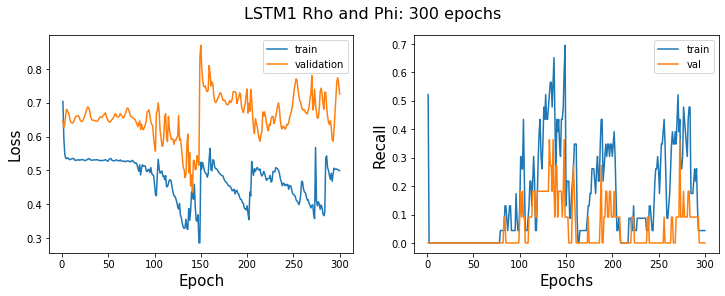

In [148]:
lr_plot(LSTM1_hist,'LSTM1 Rho and Phi: 300 epochs','LSTM1_300epochs.png')

In [149]:
LSTM1_hist2 = model_LSTM1.fit(X_train_rhophi,y_train_rhophi, epochs=300, validation_data=(X_vali_rhophi,y_vali_rhophi))

Epoch 1/300
4/4 [==============================] - 0s 90ms/step - loss: 0.4980 - accuracy: 0.7843 - true_positives: 1.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 22.0000 - precision: 1.0000 - recall: 0.0435 - val_loss: 0.7240 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/300
4/4 [==============================] - 0s 85ms/step - loss: 0.4961 - accuracy: 0.7843 - true_positives: 1.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 22.0000 - precision: 1.0000 - recall: 0.0435 - val_loss: 0.7803 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/300
4/4 [==============================] - 0s 96ms/step - lo

Epoch 19/300
4/4 [==============================] - 0s 78ms/step - loss: 0.4746 - accuracy: 0.8039 - true_positives: 4.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 19.0000 - precision: 0.8000 - recall: 0.1739 - val_loss: 0.6811 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 20/300
4/4 [==============================] - 0s 81ms/step - loss: 0.4572 - accuracy: 0.7843 - true_positives: 1.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 22.0000 - precision: 1.0000 - recall: 0.0435 - val_loss: 0.7036 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 21/300
4/4 [==============================] - 0s 78ms/step - loss: 0.454

4/4 [==============================] - 0s 87ms/step - loss: 0.3374 - accuracy: 0.8627 - true_positives: 11.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 12.0000 - precision: 0.8462 - recall: 0.4783 - val_loss: 0.6576 - val_accuracy: 0.6857 - val_true_positives: 2.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 9.0000 - val_precision: 0.5000 - val_recall: 0.1818
Epoch 56/300
4/4 [==============================] - 0s 88ms/step - loss: 0.3252 - accuracy: 0.8725 - true_positives: 11.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 12.0000 - precision: 0.9167 - recall: 0.4783 - val_loss: 0.6494 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 57/300
4/4 [==============================] - 0s 94ms/step - loss: 0.3250 - accuracy: 0.8627 - true_positives: 10

4/4 [==============================] - 0s 92ms/step - loss: 0.4573 - accuracy: 0.8137 - true_positives: 4.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 19.0000 - precision: 1.0000 - recall: 0.1739 - val_loss: 0.6859 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 92/300
4/4 [==============================] - 0s 89ms/step - loss: 0.4491 - accuracy: 0.8137 - true_positives: 4.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 19.0000 - precision: 1.0000 - recall: 0.1739 - val_loss: 0.6870 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 93/300
4/4 [==============================] - 0s 88ms/step - loss: 0.4441 - accuracy: 0.8137 - true_posit

4/4 [==============================] - 0s 86ms/step - loss: 0.3640 - accuracy: 0.8725 - true_positives: 10.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 13.0000 - precision: 1.0000 - recall: 0.4348 - val_loss: 0.7994 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 128/300
4/4 [==============================] - 0s 87ms/step - loss: 0.3596 - accuracy: 0.8725 - true_positives: 10.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 13.0000 - precision: 1.0000 - recall: 0.4348 - val_loss: 0.8032 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 129/300
4/4 [==============================] - 0s 86ms/step - loss: 0.3612 - accuracy: 0.8627 - true_po

4/4 [==============================] - 0s 92ms/step - loss: 0.4237 - accuracy: 0.8431 - true_positives: 7.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 16.0000 - precision: 1.0000 - recall: 0.3043 - val_loss: 0.7880 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 164/300
4/4 [==============================] - 0s 96ms/step - loss: 0.4194 - accuracy: 0.8431 - true_positives: 7.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 16.0000 - precision: 1.0000 - recall: 0.3043 - val_loss: 0.7753 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 165/300
4/4 [==============================] - 0s 88ms/step - loss: 0.4164 - accuracy: 0.8431 - true_posit

4/4 [==============================] - 0s 90ms/step - loss: 0.3346 - accuracy: 0.8627 - true_positives: 10.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 13.0000 - precision: 0.9091 - recall: 0.4348 - val_loss: 0.8348 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 200/300
4/4 [==============================] - 0s 85ms/step - loss: 0.3112 - accuracy: 0.8725 - true_positives: 11.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 12.0000 - precision: 0.9167 - recall: 0.4783 - val_loss: 0.7228 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 201/300
4/4 [==============================] - 0s 88ms/step - loss: 0.3230 - accuracy: 0.8529 - true_positives

4/4 [==============================] - 0s 89ms/step - loss: 0.2242 - accuracy: 0.9020 - true_positives: 17.0000 - true_negatives: 75.0000 - false_positives: 4.0000 - false_negatives: 6.0000 - precision: 0.8095 - recall: 0.7391 - val_loss: 0.7836 - val_accuracy: 0.7429 - val_true_positives: 4.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 7.0000 - val_precision: 0.6667 - val_recall: 0.3636
Epoch 236/300
4/4 [==============================] - 0s 85ms/step - loss: 0.2385 - accuracy: 0.8824 - true_positives: 17.0000 - true_negatives: 73.0000 - false_positives: 6.0000 - false_negatives: 6.0000 - precision: 0.7391 - recall: 0.7391 - val_loss: 0.5988 - val_accuracy: 0.7429 - val_true_positives: 2.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 9.0000 - val_precision: 1.0000 - val_recall: 0.1818
Epoch 237/300
4/4 [==============================] - 0s 88ms/step - loss: 0.3278 - accuracy: 0.8922 - true_positives

4/4 [==============================] - 0s 87ms/step - loss: 0.5294 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.9683 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 272/300
4/4 [==============================] - 0s 90ms/step - loss: 0.5238 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.9644 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 273/300
4/4 [==============================] - 0

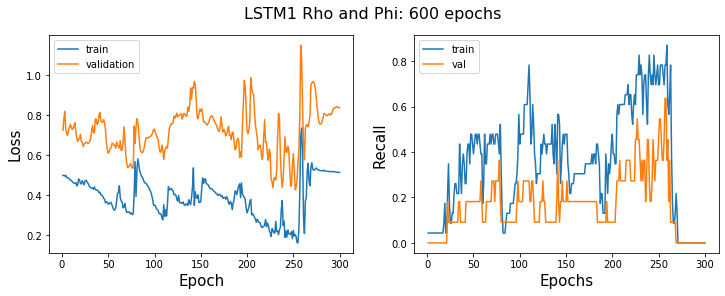

In [150]:
lr_plot(LSTM1_hist2,'LSTM1 Rho and Phi: 600 epochs','LSTM1_600epochs.png')

In [151]:
LSTM1_hist3 = model_LSTM1.fit(X_train_rhophi,y_train_rhophi, epochs=300, validation_data=(X_vali_rhophi,y_vali_rhophi))

Epoch 1/300
4/4 [==============================] - 0s 90ms/step - loss: 0.5132 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.8479 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/300
4/4 [==============================] - 0s 90ms/step - loss: 0.5123 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.8657 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/300
4/4 [===========================

4/4 [==============================] - 0s 92ms/step - loss: 0.5077 - accuracy: 0.7745 - true_positives: 1.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 22.0000 - precision: 0.5000 - recall: 0.0435 - val_loss: 0.9346 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 36/300
4/4 [==============================] - 0s 81ms/step - loss: 0.5057 - accuracy: 0.7843 - true_positives: 2.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 21.0000 - precision: 0.6667 - recall: 0.0870 - val_loss: 0.9349 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 37/300
4/4 [==============================] - 0s 79ms/step - loss: 0.4948 - accur

Epoch 70/300
4/4 [==============================] - 0s 102ms/step - loss: 0.4540 - accuracy: 0.7843 - true_positives: 1.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 22.0000 - precision: 1.0000 - recall: 0.0435 - val_loss: 0.8983 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 71/300
4/4 [==============================] - ETA: 0s - loss: 0.4485 - accuracy: 0.7745 - true_positives: 1.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 22.0000 - precision: 0.5000 - recall: 0.0435             - 0s 111ms/step - loss: 0.4485 - accuracy: 0.7745 - true_positives: 1.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 22.0000 - precision: 0.5000 - recall: 0.0435 - val_loss: 0.9023 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 2

Epoch 88/300
4/4 [==============================] - 0s 93ms/step - loss: 0.4045 - accuracy: 0.8529 - true_positives: 11.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 12.0000 - precision: 0.7857 - recall: 0.4783 - val_loss: 0.8438 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 89/300
4/4 [==============================] - 0s 94ms/step - loss: 0.3482 - accuracy: 0.8333 - true_positives: 8.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 15.0000 - precision: 0.8000 - recall: 0.3478 - val_loss: 0.9431 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 90/300
4/4 [==============================] - 0s 86ms/step - loss: 0.3927 - accuracy: 0.8137 - true_p

4/4 [==============================] - 0s 99ms/step - loss: 0.4114 - accuracy: 0.8333 - true_positives: 8.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 15.0000 - precision: 0.8000 - recall: 0.3478 - val_loss: 0.5779 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 125/300
4/4 [==============================] - 0s 95ms/step - loss: 0.4028 - accuracy: 0.8431 - true_positives: 9.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 14.0000 - precision: 0.8182 - recall: 0.3913 - val_loss: 0.5715 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 126/300
4/4 [==============================] - 0s 93ms/step - loss: 0.3727 - accuracy: 0.8529 - true_positives: 10

4/4 [==============================] - 0s 96ms/step - loss: 0.3153 - accuracy: 0.9020 - true_positives: 13.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 10.0000 - precision: 1.0000 - recall: 0.5652 - val_loss: 0.5298 - val_accuracy: 0.7143 - val_true_positives: 3.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 8.0000 - val_precision: 0.6000 - val_recall: 0.2727
Epoch 161/300
4/4 [==============================] - 0s 94ms/step - loss: 0.3125 - accuracy: 0.8824 - true_positives: 13.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 10.0000 - precision: 0.8667 - recall: 0.5652 - val_loss: 0.5546 - val_accuracy: 0.7429 - val_true_positives: 3.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 8.0000 - val_precision: 0.7500 - val_recall: 0.2727
Epoch 162/300
4/4 [==============================] - 0s 91ms/step - loss: 0.3017 - accuracy: 0.8824 - true_positiv

4/4 [==============================] - 0s 96ms/step - loss: 0.3759 - accuracy: 0.8431 - true_positives: 10.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 13.0000 - precision: 0.7692 - recall: 0.4348 - val_loss: 0.6956 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 197/300
4/4 [==============================] - 0s 91ms/step - loss: 0.3733 - accuracy: 0.8333 - true_positives: 6.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 17.0000 - precision: 1.0000 - recall: 0.2609 - val_loss: 0.6629 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 198/300
4/4 [==============================] - 0s 92ms/step - loss: 0.3791 - accuracy: 0.8235 - true_positi

4/4 [==============================] - 0s 88ms/step - loss: 0.2155 - accuracy: 0.9412 - true_positives: 17.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 6.0000 - precision: 1.0000 - recall: 0.7391 - val_loss: 0.6504 - val_accuracy: 0.7143 - val_true_positives: 3.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 8.0000 - val_precision: 0.6000 - val_recall: 0.2727
Epoch 233/300
4/4 [==============================] - 0s 91ms/step - loss: 0.2371 - accuracy: 0.9314 - true_positives: 17.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 6.0000 - precision: 0.9444 - recall: 0.7391 - val_loss: 0.7607 - val_accuracy: 0.6857 - val_true_positives: 2.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 9.0000 - val_precision: 0.5000 - val_recall: 0.1818
Epoch 234/300
4/4 [==============================] - 0s 90ms/step - loss: 0.4281 - accuracy: 0.8235 - true_positives

4/4 [==============================] - 0s 89ms/step - loss: 0.2346 - accuracy: 0.9412 - true_positives: 20.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 3.0000 - precision: 0.8696 - recall: 0.8696 - val_loss: 0.5951 - val_accuracy: 0.6571 - val_true_positives: 2.0000 - val_true_negatives: 21.0000 - val_false_positives: 3.0000 - val_false_negatives: 9.0000 - val_precision: 0.4000 - val_recall: 0.1818
Epoch 269/300
4/4 [==============================] - 0s 92ms/step - loss: 0.2229 - accuracy: 0.9412 - true_positives: 19.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 4.0000 - precision: 0.9048 - recall: 0.8261 - val_loss: 0.6101 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 270/300
4/4 [==============================] - 0s 88ms/step - loss: 0.2221 - accuracy: 0.9314 - true_positives: 18

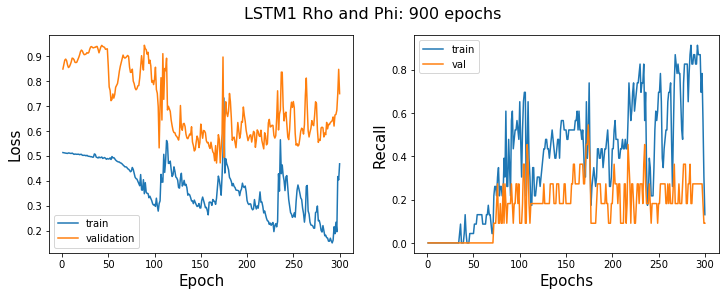

In [152]:
lr_plot(LSTM1_hist3,'LSTM1 Rho and Phi: 900 epochs','LSTM1_900epochs.png')

**this architecture as is does not seem to want to have a recall better then .4 and now it seems to be over fitting**

lets try with some drop out and more neurons

In [278]:

model_LSTM2 = keras.Sequential()
model_LSTM2.add(keras.layers.LSTM(100, input_shape=(206, 2), return_sequences=True))
model_LSTM2.add(Dropout(.5))
model_LSTM2.add(keras.layers.LSTM(100, return_sequences=False))
model_LSTM2.add(keras.layers.Dense(1, activation='sigmoid'))
model_LSTM2.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=metrics1)

In [279]:
model_LSTM2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 206, 100)          41200     
_________________________________________________________________
dropout (Dropout)            (None, 206, 100)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 121,701
Trainable params: 121,701
Non-trainable params: 0
_________________________________________________________________


In [166]:
LSTM2_hist = model_LSTM2.fit(X_train_rhophi,y_train_rhophi, epochs=300, validation_data=(X_vali_rhophi,y_vali_rhophi))

Epoch 1/300
4/4 [==============================] - 2s 421ms/step - loss: 0.5950 - accuracy: 0.6765 - true_positives: 4.0000 - true_negatives: 65.0000 - false_positives: 14.0000 - false_negatives: 19.0000 - precision: 0.2222 - recall: 0.1739 - val_loss: 0.7199 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/300
4/4 [==============================] - 1s 152ms/step - loss: 0.5648 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6835 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/300
4/4 [==============================] - 1s 155

4/4 [==============================] - 1s 164ms/step - loss: 0.5180 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6909 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 36/300
4/4 [==============================] - 1s 168ms/step - loss: 0.5287 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6949 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 37/300
4/4 [==============================] - 1

4/4 [==============================] - 1s 175ms/step - loss: 0.5271 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6539 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 70/300
4/4 [==============================] - 1s 170ms/step - loss: 0.5366 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6463 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 71/300
4/4 [==============================] - 1

4/4 [==============================] - 1s 174ms/step - loss: 0.5146 - accuracy: 0.7843 - true_positives: 2.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 21.0000 - precision: 0.6667 - recall: 0.0870 - val_loss: 0.7132 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 104/300
4/4 [==============================] - 1s 172ms/step - loss: 0.5060 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.7276 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 105/300
4/4 [==============================] - 1s 168ms/step -

4/4 [==============================] - 1s 168ms/step - loss: 0.5058 - accuracy: 0.7941 - true_positives: 2.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 21.0000 - precision: 1.0000 - recall: 0.0870 - val_loss: 0.6954 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 138/300
4/4 [==============================] - 1s 166ms/step - loss: 0.4895 - accuracy: 0.7745 - true_positives: 2.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 21.0000 - precision: 0.5000 - recall: 0.0870 - val_loss: 0.6969 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 139/300
4/4 [==============================] - 1s 169ms/step - loss: 0.495

Epoch 155/300
4/4 [==============================] - 1s 167ms/step - loss: 0.4973 - accuracy: 0.7941 - true_positives: 3.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 20.0000 - precision: 0.7500 - recall: 0.1304 - val_loss: 0.7088 - val_accuracy: 0.7143 - val_true_positives: 1.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 10.0000 - val_precision: 1.0000 - val_recall: 0.0909
Epoch 156/300
4/4 [==============================] - 1s 168ms/step - loss: 0.4989 - accuracy: 0.7941 - true_positives: 4.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 19.0000 - precision: 0.6667 - recall: 0.1739 - val_loss: 0.6562 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 157/300
4/4 [==============================] - 1s 168ms/step - loss: 0.5240 - accuracy: 0.76

Epoch 173/300
4/4 [==============================] - 1s 166ms/step - loss: 0.5098 - accuracy: 0.7843 - true_positives: 2.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 21.0000 - precision: 0.6667 - recall: 0.0870 - val_loss: 0.7185 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 174/300
4/4 [==============================] - 1s 165ms/step - loss: 0.4921 - accuracy: 0.7941 - true_positives: 2.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 21.0000 - precision: 1.0000 - recall: 0.0870 - val_loss: 0.6852 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 175/300
4/4 [==============================] - 1s 170ms/step

Epoch 191/300
4/4 [==============================] - 1s 177ms/step - loss: 0.4649 - accuracy: 0.8039 - true_positives: 7.0000 - true_negatives: 75.0000 - false_positives: 4.0000 - false_negatives: 16.0000 - precision: 0.6364 - recall: 0.3043 - val_loss: 0.5647 - val_accuracy: 0.7429 - val_true_positives: 3.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 8.0000 - val_precision: 0.7500 - val_recall: 0.2727
Epoch 192/300
4/4 [==============================] - 1s 180ms/step - loss: 0.4169 - accuracy: 0.8627 - true_positives: 11.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 12.0000 - precision: 0.8462 - recall: 0.4783 - val_loss: 0.8405 - val_accuracy: 0.5714 - val_true_positives: 2.0000 - val_true_negatives: 18.0000 - val_false_positives: 6.0000 - val_false_negatives: 9.0000 - val_precision: 0.2500 - val_recall: 0.1818
Epoch 193/300
4/4 [==============================] - 1s 177ms/step - loss: 0.5804 - accuracy: 0.7353 - 

Epoch 226/300
4/4 [==============================] - 1s 190ms/step - loss: 0.4984 - accuracy: 0.7941 - true_positives: 2.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 21.0000 - precision: 1.0000 - recall: 0.0870 - val_loss: 0.7093 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 227/300
4/4 [==============================] - 1s 180ms/step - loss: 0.5179 - accuracy: 0.7549 - true_positives: 6.0000 - true_negatives: 71.0000 - false_positives: 8.0000 - false_negatives: 17.0000 - precision: 0.4286 - recall: 0.2609 - val_loss: 0.7098 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 228/300
4/4 [==============================] - 1s 198ms/step - loss:

Epoch 244/300
4/4 [==============================] - 1s 173ms/step - loss: 0.4807 - accuracy: 0.8039 - true_positives: 3.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 20.0000 - precision: 1.0000 - recall: 0.1304 - val_loss: 0.7370 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 245/300
4/4 [==============================] - 1s 191ms/step - loss: 0.4757 - accuracy: 0.8039 - true_positives: 3.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 20.0000 - precision: 1.0000 - recall: 0.1304 - val_loss: 0.6739 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 246/300
4/4 [==============================] - 1s 172ms/step - loss: 0.4609 - accuracy: 0

4/4 [==============================] - 1s 200ms/step - loss: 0.4431 - accuracy: 0.8235 - true_positives: 8.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 15.0000 - precision: 0.7273 - recall: 0.3478 - val_loss: 0.6572 - val_accuracy: 0.7429 - val_true_positives: 3.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 8.0000 - val_precision: 0.7500 - val_recall: 0.2727
Epoch 263/300
4/4 [==============================] - 1s 202ms/step - loss: 0.4454 - accuracy: 0.8235 - true_positives: 8.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 15.0000 - precision: 0.7273 - recall: 0.3478 - val_loss: 0.6486 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 264/300
4/4 [==============================] - 1s 202ms/step - loss: 0.4386 - accuracy: 0.8333 - true_positives:

Epoch 298/300
4/4 [==============================] - 1s 195ms/step - loss: 0.3544 - accuracy: 0.8627 - true_positives: 12.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 11.0000 - precision: 0.8000 - recall: 0.5217 - val_loss: 0.4617 - val_accuracy: 0.7429 - val_true_positives: 3.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 8.0000 - val_precision: 0.7500 - val_recall: 0.2727
Epoch 299/300
4/4 [==============================] - 1s 197ms/step - loss: 0.4146 - accuracy: 0.8235 - true_positives: 6.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 17.0000 - precision: 0.8571 - recall: 0.2609 - val_loss: 0.5807 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 300/300
4/4 [==============================] - 1s 188ms/step - loss: 0.4214 - accuracy: 0.7941 - 

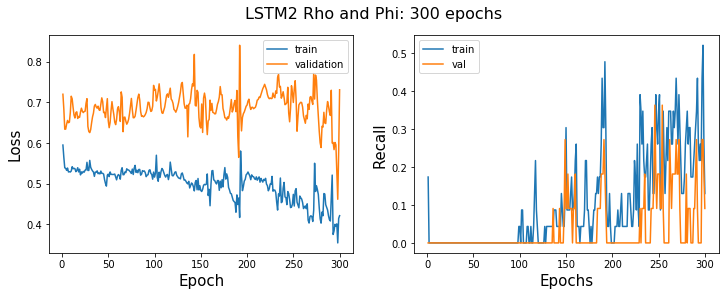

In [167]:
lr_plot(LSTM2_hist,'LSTM2 Rho and Phi: 300 epochs','LSTM2_300epochs.png')

In [168]:
LSTM2_hist2 = model_LSTM2.fit(X_train_rhophi,y_train_rhophi, epochs=300, validation_data=(X_vali_rhophi,y_vali_rhophi))

Epoch 1/300
4/4 [==============================] - 1s 144ms/step - loss: 0.5338 - accuracy: 0.7745 - true_positives: 3.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 20.0000 - precision: 0.5000 - recall: 0.1304 - val_loss: 0.9265 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/300
4/4 [==============================] - 1s 139ms/step - loss: 0.5828 - accuracy: 0.7647 - true_positives: 2.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 21.0000 - precision: 0.4000 - recall: 0.0870 - val_loss: 0.6781 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 3/300
4/4 [==============================] - 1s 139ms/step - loss: 0.5606 - accuracy: 0.

Epoch 19/300
4/4 [==============================] - 1s 143ms/step - loss: 0.5283 - accuracy: 0.7255 - true_positives: 6.0000 - true_negatives: 68.0000 - false_positives: 11.0000 - false_negatives: 17.0000 - precision: 0.3529 - recall: 0.2609 - val_loss: 0.6552 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 20/300
4/4 [==============================] - 1s 151ms/step - loss: 0.4720 - accuracy: 0.7843 - true_positives: 1.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 22.0000 - precision: 1.0000 - recall: 0.0435 - val_loss: 0.7141 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 21/300
4/4 [==============================] - 1s 153ms/step -

4/4 [==============================] - 1s 167ms/step - loss: 0.5297 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6392 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 54/300
4/4 [==============================] - 1s 169ms/step - loss: 0.5348 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6354 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 55/300
4/4 [==============================] - 1

4/4 [==============================] - 1s 175ms/step - loss: 0.5233 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6983 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 88/300
4/4 [==============================] - 1s 171ms/step - loss: 0.5165 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6876 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 89/300
4/4 [==============================] - 1

4/4 [==============================] - 1s 169ms/step - loss: 0.5301 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6490 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 122/300
4/4 [==============================] - 1s 170ms/step - loss: 0.5308 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6453 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 123/300
4/4 [==============================] -

4/4 [==============================] - 1s 166ms/step - loss: 0.5335 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6453 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 156/300
4/4 [==============================] - 1s 169ms/step - loss: 0.5391 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6387 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 157/300
4/4 [==============================] -

4/4 [==============================] - 1s 170ms/step - loss: 0.5398 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6562 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 190/300
4/4 [==============================] - 1s 167ms/step - loss: 0.5313 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6494 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 191/300
4/4 [==============================] -

4/4 [==============================] - 1s 169ms/step - loss: 0.5306 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6444 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 224/300
4/4 [==============================] - 1s 169ms/step - loss: 0.5379 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6485 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 225/300
4/4 [==============================] -

4/4 [==============================] - 1s 170ms/step - loss: 0.5259 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6674 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 258/300
4/4 [==============================] - 1s 169ms/step - loss: 0.5316 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6745 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 259/300
4/4 [==============================] -

4/4 [==============================] - 1s 169ms/step - loss: 0.5306 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6668 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 292/300
4/4 [==============================] - 1s 174ms/step - loss: 0.5406 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6653 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 293/300
4/4 [==============================] -

In [ ]:
#maybe deeper

In [26]:

model_LSTM3 = keras.Sequential()
model_LSTM3.add(keras.layers.LSTM(50, input_shape=(206, 2), return_sequences=True))
model_LSTM3.add(Dropout(.5))
model_LSTM3.add(keras.layers.LSTM(50, return_sequences=True))
model_LSTM3.add(Dropout(.5))
model_LSTM3.add(keras.layers.LSTM(50, return_sequences=True))
model_LSTM3.add(Dropout(.5))
model_LSTM3.add(keras.layers.LSTM(32, return_sequences=False))
model_LSTM3.add(keras.layers.Dense(1, activation='sigmoid'))
model_LSTM3.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=metrics1)

In [28]:
model_LSTM3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 206, 50)           10600     
_________________________________________________________________
dropout (Dropout)            (None, 206, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 206, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 206, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 206, 50)           20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 206, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                1

In [29]:
LSTM3_hist = model_LSTM3.fit(X_train_rhophi,y_train_rhophi, epochs=300, validation_data=(X_vali_rhophi,y_vali_rhophi))

Epoch 1/300
4/4 [==============================] - 2s 488ms/step - loss: 0.6426 - accuracy: 0.7451 - true_positives: 1.0000 - true_negatives: 75.0000 - false_positives: 4.0000 - false_negatives: 22.0000 - precision: 0.2000 - recall: 0.0435 - val_loss: 0.6162 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/300
4/4 [==============================] - 1s 152ms/step - loss: 0.5341 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.7032 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/300
4/4 [==============================] - 1s 150m

4/4 [==============================] - 1s 199ms/step - loss: 0.5381 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6955 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 36/300
4/4 [==============================] - 1s 178ms/step - loss: 0.5371 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6788 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 37/300
4/4 [==============================] - 1

Epoch 70/300
4/4 [==============================] - 1s 178ms/step - loss: 0.5227 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6564 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 71/300
4/4 [==============================] - 1s 202ms/step - loss: 0.5342 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6621 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 72/300
4/4 [======================

4/4 [==============================] - 1s 231ms/step - loss: 0.5301 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6495 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 105/300
4/4 [==============================] - 1s 226ms/step - loss: 0.5149 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6614 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 106/300
4/4 [==============================] -

Epoch 122/300
4/4 [==============================] - 1s 179ms/step - loss: 0.4832 - accuracy: 0.8137 - true_positives: 4.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 19.0000 - precision: 1.0000 - recall: 0.1739 - val_loss: 0.6785 - val_accuracy: 0.6571 - val_true_positives: 1.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 10.0000 - val_precision: 0.3333 - val_recall: 0.0909
Epoch 123/300
4/4 [==============================] - 1s 191ms/step - loss: 0.5097 - accuracy: 0.7745 - true_positives: 1.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 22.0000 - precision: 0.5000 - recall: 0.0435 - val_loss: 0.6954 - val_accuracy: 0.6571 - val_true_positives: 1.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 10.0000 - val_precision: 0.3333 - val_recall: 0.0909
Epoch 124/300
4/4 [==============================] - 1s 202ms/step - loss: 0.4732 - accuracy: 0.80

Epoch 140/300
4/4 [==============================] - 1s 211ms/step - loss: 0.5101 - accuracy: 0.7745 - true_positives: 2.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 21.0000 - precision: 0.5000 - recall: 0.0870 - val_loss: 0.5344 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 141/300
4/4 [==============================] - 1s 206ms/step - loss: 0.5104 - accuracy: 0.7843 - true_positives: 1.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 22.0000 - precision: 1.0000 - recall: 0.0435 - val_loss: 0.6252 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 142/300
4/4 [==============================] - 1s 186ms/step - loss: 0.51

Epoch 158/300
4/4 [==============================] - 1s 171ms/step - loss: 0.6223 - accuracy: 0.6667 - true_positives: 12.0000 - true_negatives: 56.0000 - false_positives: 23.0000 - false_negatives: 11.0000 - precision: 0.3429 - recall: 0.5217 - val_loss: 0.8055 - val_accuracy: 0.6000 - val_true_positives: 2.0000 - val_true_negatives: 19.0000 - val_false_positives: 5.0000 - val_false_negatives: 9.0000 - val_precision: 0.2857 - val_recall: 0.1818
Epoch 159/300
4/4 [==============================] - 1s 174ms/step - loss: 0.5773 - accuracy: 0.6961 - true_positives: 5.0000 - true_negatives: 66.0000 - false_positives: 13.0000 - false_negatives: 18.0000 - precision: 0.2778 - recall: 0.2174 - val_loss: 0.7164 - val_accuracy: 0.7143 - val_true_positives: 1.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 10.0000 - val_precision: 1.0000 - val_recall: 0.0909
Epoch 160/300
4/4 [==============================] - 1s 175ms/step - loss: 0.5220 - accuracy: 0.

Epoch 176/300
4/4 [==============================] - 1s 173ms/step - loss: 0.5109 - accuracy: 0.7745 - true_positives: 7.0000 - true_negatives: 72.0000 - false_positives: 7.0000 - false_negatives: 16.0000 - precision: 0.5000 - recall: 0.3043 - val_loss: 0.6081 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 177/300
4/4 [==============================] - 1s 193ms/step - loss: 0.4955 - accuracy: 0.7941 - true_positives: 3.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 20.0000 - precision: 0.7500 - recall: 0.1304 - val_loss: 0.7337 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 178/300
4/4 [==============================] - 1s 185ms/step - loss: 0.4723 - ac

Epoch 194/300
4/4 [==============================] - 1s 166ms/step - loss: 0.4882 - accuracy: 0.7941 - true_positives: 3.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 20.0000 - precision: 0.7500 - recall: 0.1304 - val_loss: 0.6448 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 195/300
4/4 [==============================] - 1s 168ms/step - loss: 0.4867 - accuracy: 0.7941 - true_positives: 3.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 20.0000 - precision: 0.7500 - recall: 0.1304 - val_loss: 0.6306 - val_accuracy: 0.6571 - val_true_positives: 1.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 10.0000 - val_precision: 0.3333 - val_recall: 0.0909
Epoch 196/300
4/4 [==============================] - 1s 169ms/step - loss: 0.4793 - accura

4/4 [==============================] - 1s 166ms/step - loss: 0.4934 - accuracy: 0.8039 - true_positives: 3.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 20.0000 - precision: 1.0000 - recall: 0.1304 - val_loss: 0.6377 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 231/300
4/4 [==============================] - 1s 166ms/step - loss: 0.4958 - accuracy: 0.7941 - true_positives: 3.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 20.0000 - precision: 0.7500 - recall: 0.1304 - val_loss: 0.6177 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 232/300
4/4 [==============================] - 1s 166ms/step - loss: 0.4816 - accu

4/4 [==============================] - 1s 167ms/step - loss: 0.5303 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6504 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 266/300
4/4 [==============================] - 1s 166ms/step - loss: 0.5285 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6411 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 267/300
4/4 [==============================] -

4/4 [==============================] - 1s 166ms/step - loss: 0.5032 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5831 - val_accuracy: 0.7143 - val_true_positives: 1.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 10.0000 - val_precision: 1.0000 - val_recall: 0.0909
Epoch 300/300
4/4 [==============================] - 1s 182ms/step - loss: 0.5034 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5593 - val_accuracy: 0.7143 - val_true_positives: 1.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 10.0000 - val_precision: 1.0000 - val_recall: 0.0909


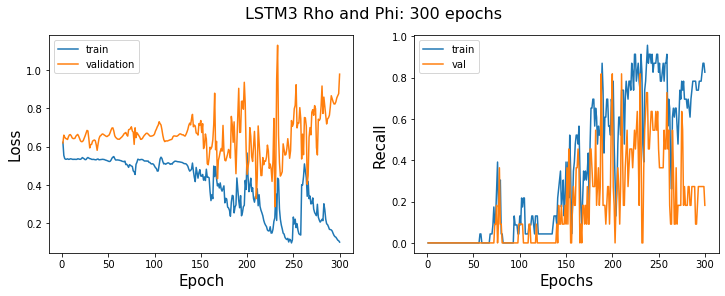

In [285]:
#lr_plot(LSTM2_hist3,'LSTM3 Rho and Phi: 300 epochs','LSTM3_epochs.png')

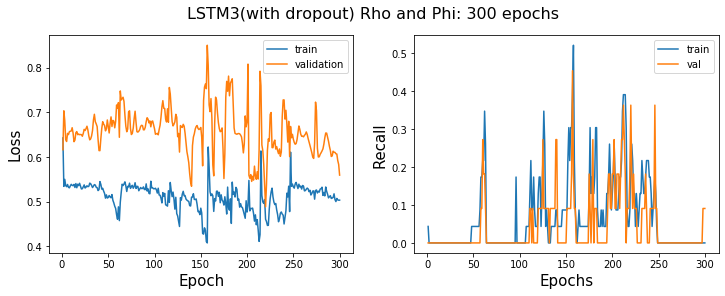

In [32]:
lr_plot(LSTM3_hist,'LSTM3(with dropout) Rho and Phi: 300 epochs','LSTM3_longer.png')

In [33]:
LSTM3_hist2 = model_LSTM3.fit(X_train_rhophi,y_train_rhophi, epochs=300, validation_data=(X_vali_rhophi,y_vali_rhophi))

Epoch 1/300
4/4 [==============================] - 1s 159ms/step - loss: 0.5327 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6169 - val_accuracy: 0.7143 - val_true_positives: 1.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 10.0000 - val_precision: 1.0000 - val_recall: 0.0909
Epoch 2/300
4/4 [==============================] - 1s 161ms/step - loss: 0.5229 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6064 - val_accuracy: 0.7143 - val_true_positives: 1.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 10.0000 - val_precision: 1.0000 - val_recall: 0.0909
Epoch 3/300
4/4 [==============================] - 1s 158ms/step -

4/4 [==============================] - 1s 187ms/step - loss: 0.5319 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6514 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 36/300
4/4 [==============================] - 1s 173ms/step - loss: 0.5409 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6555 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 37/300
4/4 [==============================] - 1

4/4 [==============================] - 1s 173ms/step - loss: 0.5333 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6486 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 70/300
4/4 [==============================] - 1s 170ms/step - loss: 0.5345 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6499 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 71/300
4/4 [==============================] - 1

4/4 [==============================] - 1s 196ms/step - loss: 0.5389 - accuracy: 0.7843 - true_positives: 1.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 22.0000 - precision: 1.0000 - recall: 0.0435 - val_loss: 0.6604 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 104/300
4/4 [==============================] - 1s 182ms/step - loss: 0.5326 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6560 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 105/300
4/4 [==============================] - 1s 176ms/st

Epoch 121/300
4/4 [==============================] - 1s 199ms/step - loss: 0.5110 - accuracy: 0.7941 - true_positives: 2.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 21.0000 - precision: 1.0000 - recall: 0.0870 - val_loss: 0.6286 - val_accuracy: 0.7143 - val_true_positives: 1.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 10.0000 - val_precision: 1.0000 - val_recall: 0.0909
Epoch 122/300
4/4 [==============================] - 1s 179ms/step - loss: 0.5123 - accuracy: 0.7941 - true_positives: 2.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 21.0000 - precision: 1.0000 - recall: 0.0870 - val_loss: 0.6252 - val_accuracy: 0.7143 - val_true_positives: 1.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 10.0000 - val_precision: 1.0000 - val_recall: 0.0909
Epoch 123/300
4/4 [==============================] - 1s 193ms/step - loss: 0.5143 - ac

Epoch 139/300
4/4 [==============================] - 1s 184ms/step - loss: 0.5522 - accuracy: 0.7843 - true_positives: 1.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 22.0000 - precision: 1.0000 - recall: 0.0435 - val_loss: 0.6691 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 140/300
4/4 [==============================] - 1s 186ms/step - loss: 0.5265 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6856 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 141/300
4/4 [==============================]

4/4 [==============================] - 1s 211ms/step - loss: 0.5217 - accuracy: 0.7843 - true_positives: 1.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 22.0000 - precision: 1.0000 - recall: 0.0435 - val_loss: 0.6651 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 174/300
4/4 [==============================] - 1s 199ms/step - loss: 0.5210 - accuracy: 0.7843 - true_positives: 1.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 22.0000 - precision: 1.0000 - recall: 0.0435 - val_loss: 0.6747 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 175/300
4/4 [==============================] - 1s 186ms/step - loss: 0

Epoch 191/300
4/4 [==============================] - 1s 199ms/step - loss: 0.4934 - accuracy: 0.8039 - true_positives: 6.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 17.0000 - precision: 0.6667 - recall: 0.2609 - val_loss: 0.7253 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 192/300
4/4 [==============================] - 1s 204ms/step - loss: 0.5096 - accuracy: 0.7843 - true_positives: 2.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 21.0000 - precision: 0.6667 - recall: 0.0870 - val_loss: 0.7191 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 193/300
4/4 [==============================] - 1s 201ms/step - loss: 0.5

Epoch 209/300
4/4 [==============================] - 1s 175ms/step - loss: 0.4939 - accuracy: 0.7843 - true_positives: 1.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 22.0000 - precision: 1.0000 - recall: 0.0435 - val_loss: 0.7185 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 210/300
4/4 [==============================] - 1s 174ms/step - loss: 0.4934 - accuracy: 0.7941 - true_positives: 2.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 21.0000 - precision: 1.0000 - recall: 0.0870 - val_loss: 0.6694 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 211/300
4/4 [==============================] - 1s 172ms/step - l

Epoch 227/300
4/4 [==============================] - 1s 176ms/step - loss: 0.5117 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6557 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 228/300
4/4 [==============================] - 1s 174ms/step - loss: 0.5065 - accuracy: 0.8039 - true_positives: 3.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 20.0000 - precision: 1.0000 - recall: 0.1304 - val_loss: 0.6357 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 229/300
4/4 [==============================] - 1s 17

Epoch 245/300
4/4 [==============================] - 1s 172ms/step - loss: 0.5220 - accuracy: 0.7843 - true_positives: 1.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 22.0000 - precision: 1.0000 - recall: 0.0435 - val_loss: 0.6446 - val_accuracy: 0.7143 - val_true_positives: 1.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 10.0000 - val_precision: 1.0000 - val_recall: 0.0909
Epoch 246/300
4/4 [==============================] - 1s 171ms/step - loss: 0.5247 - accuracy: 0.7843 - true_positives: 1.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 22.0000 - precision: 1.0000 - recall: 0.0435 - val_loss: 0.6463 - val_accuracy: 0.7143 - val_true_positives: 1.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 10.0000 - val_precision: 1.0000 - val_recall: 0.0909
Epoch 247/300
4/4 [==============================] - 1s 173ms/step - loss: 0.5206 - ac

Epoch 281/300
4/4 [==============================] - 1s 168ms/step - loss: 0.4555 - accuracy: 0.8235 - true_positives: 8.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 15.0000 - precision: 0.7273 - recall: 0.3478 - val_loss: 0.5886 - val_accuracy: 0.7429 - val_true_positives: 3.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 8.0000 - val_precision: 0.7500 - val_recall: 0.2727
Epoch 282/300
4/4 [==============================] - 1s 167ms/step - loss: 0.4477 - accuracy: 0.8235 - true_positives: 8.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 15.0000 - precision: 0.7273 - recall: 0.3478 - val_loss: 0.6248 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 283/300
4/4 [==============================] - 1s 197ms/step - loss: 0.4597 - accuracy: 0.8137 - t

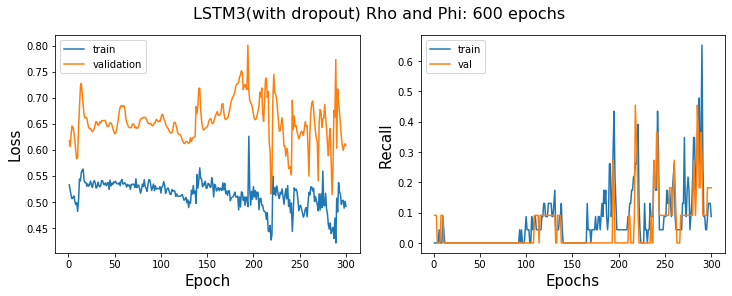

In [34]:
lr_plot(LSTM3_hist2,'LSTM3(with dropout) Rho and Phi: 600 epochs','LSTM3_600epochs.png')

In [35]:
LSTM3_hist3 = model_LSTM3.fit(X_train_rhophi,y_train_rhophi, epochs=300, validation_data=(X_vali_rhophi,y_vali_rhophi))

Epoch 1/300
4/4 [==============================] - 1s 155ms/step - loss: 0.4863 - accuracy: 0.7941 - true_positives: 3.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 20.0000 - precision: 0.7500 - recall: 0.1304 - val_loss: 0.6012 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 2/300
4/4 [==============================] - 1s 157ms/step - loss: 0.4837 - accuracy: 0.8137 - true_positives: 4.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 19.0000 - precision: 1.0000 - recall: 0.1739 - val_loss: 0.5928 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 3/300
4/4 [==============================] - 1s 157ms/step - loss: 0.4794 - accuracy: 0.8039 - tru

4/4 [==============================] - 1s 194ms/step - loss: 0.4441 - accuracy: 0.7451 - true_positives: 6.0000 - true_negatives: 70.0000 - false_positives: 9.0000 - false_negatives: 17.0000 - precision: 0.4000 - recall: 0.2609 - val_loss: 0.5337 - val_accuracy: 0.7429 - val_true_positives: 2.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 9.0000 - val_precision: 1.0000 - val_recall: 0.1818
Epoch 38/300
4/4 [==============================] - 1s 202ms/step - loss: 0.4444 - accuracy: 0.7941 - true_positives: 7.0000 - true_negatives: 74.0000 - false_positives: 5.0000 - false_negatives: 16.0000 - precision: 0.5833 - recall: 0.3043 - val_loss: 0.6346 - val_accuracy: 0.6571 - val_true_positives: 4.0000 - val_true_negatives: 19.0000 - val_false_positives: 5.0000 - val_false_negatives: 7.0000 - val_precision: 0.4444 - val_recall: 0.3636
Epoch 39/300
4/4 [==============================] - 1s 201ms/step - loss: 0.5417 - accuracy: 0.6961 - true_positive

4/4 [==============================] - 1s 203ms/step - loss: 0.4758 - accuracy: 0.7745 - true_positives: 6.0000 - true_negatives: 73.0000 - false_positives: 6.0000 - false_negatives: 17.0000 - precision: 0.5000 - recall: 0.2609 - val_loss: 0.5754 - val_accuracy: 0.7429 - val_true_positives: 3.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 8.0000 - val_precision: 0.7500 - val_recall: 0.2727
Epoch 74/300
4/4 [==============================] - 1s 208ms/step - loss: 0.4594 - accuracy: 0.8039 - true_positives: 10.0000 - true_negatives: 72.0000 - false_positives: 7.0000 - false_negatives: 13.0000 - precision: 0.5882 - recall: 0.4348 - val_loss: 0.5945 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 75/300
4/4 [==============================] - 1s 197ms/step - loss: 0.4231 - accuracy: 0.8235 - true_positives: 

4/4 [==============================] - 1s 189ms/step - loss: 0.4048 - accuracy: 0.8333 - true_positives: 9.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 14.0000 - precision: 0.7500 - recall: 0.3913 - val_loss: 0.6104 - val_accuracy: 0.7143 - val_true_positives: 3.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 8.0000 - val_precision: 0.6000 - val_recall: 0.2727
Epoch 110/300
4/4 [==============================] - 1s 188ms/step - loss: 0.3881 - accuracy: 0.8529 - true_positives: 10.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 13.0000 - precision: 0.8333 - recall: 0.4348 - val_loss: 0.5438 - val_accuracy: 0.8000 - val_true_positives: 4.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 7.0000 - val_precision: 1.0000 - val_recall: 0.3636
Epoch 111/300
4/4 [==============================] - 1s 175ms/step - loss: 0.4052 - accuracy: 0.8529 - true_posit

4/4 [==============================] - 2s 396ms/step - loss: 0.5552 - accuracy: 0.7745 - true_positives: 1.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 22.0000 - precision: 0.5000 - recall: 0.0435 - val_loss: 0.6610 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 146/300
4/4 [==============================] - 1s 197ms/step - loss: 0.5610 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6535 - val_accuracy: 0.6571 - val_true_positives: 0.0000e+00 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 147/300
4/4 [==============================] - 1s 190ms/step - los

4/4 [==============================] - 1s 166ms/step - loss: 0.5094 - accuracy: 0.7941 - true_positives: 5.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 18.0000 - precision: 0.6250 - recall: 0.2174 - val_loss: 0.6597 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 181/300
4/4 [==============================] - 1s 167ms/step - loss: 0.4922 - accuracy: 0.7843 - true_positives: 4.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 19.0000 - precision: 0.5714 - recall: 0.1739 - val_loss: 0.6594 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 182/300
4/4 [==============================] - 1s 167ms/step - loss: 0.4754 - accuracy: 0.8137 - true_positives

4/4 [==============================] - 1s 170ms/step - loss: 0.4585 - accuracy: 0.7941 - true_positives: 3.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 20.0000 - precision: 0.7500 - recall: 0.1304 - val_loss: 0.5939 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 217/300
4/4 [==============================] - 1s 168ms/step - loss: 0.4686 - accuracy: 0.8039 - true_positives: 4.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 19.0000 - precision: 0.8000 - recall: 0.1739 - val_loss: 0.5995 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 218/300
4/4 [==============================] - 1s 184ms/step - loss: 0.4498 - accuracy: 0.8137 - true_positives

4/4 [==============================] - 1s 167ms/step - loss: 0.3568 - accuracy: 0.8333 - true_positives: 9.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 14.0000 - precision: 0.7500 - recall: 0.3913 - val_loss: 0.5906 - val_accuracy: 0.6571 - val_true_positives: 1.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 10.0000 - val_precision: 0.3333 - val_recall: 0.0909
Epoch 253/300
4/4 [==============================] - 1s 167ms/step - loss: 0.3447 - accuracy: 0.8333 - true_positives: 7.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 16.0000 - precision: 0.8750 - recall: 0.3043 - val_loss: 0.5322 - val_accuracy: 0.7429 - val_true_positives: 4.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 7.0000 - val_precision: 0.6667 - val_recall: 0.3636
Epoch 254/300
4/4 [==============================] - 1s 167ms/step - loss: 0.4110 - accuracy: 0.8137 - true_positives

4/4 [==============================] - 1s 168ms/step - loss: 0.4726 - accuracy: 0.8039 - true_positives: 5.0000 - true_negatives: 77.0000 - false_positives: 2.0000 - false_negatives: 18.0000 - precision: 0.7143 - recall: 0.2174 - val_loss: 0.6915 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 289/300
4/4 [==============================] - 1s 167ms/step - loss: 0.4564 - accuracy: 0.8039 - true_positives: 3.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 20.0000 - precision: 1.0000 - recall: 0.1304 - val_loss: 0.6923 - val_accuracy: 0.6857 - val_true_positives: 1.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 10.0000 - val_precision: 0.5000 - val_recall: 0.0909
Epoch 290/300
4/4 [==============================] - 1s 165ms/step - loss: 0.4196 - accuracy: 0.8333 - true_posi

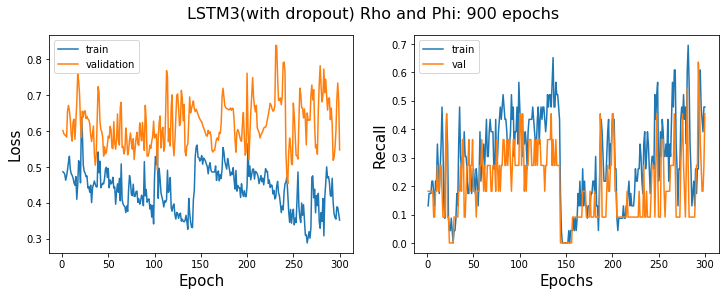

In [36]:
lr_plot(LSTM3_hist3,'LSTM3(with dropout) Rho and Phi: 900 epochs','LSTM3_900epochs.png')

In [37]:
LSTM3_hist4 = model_LSTM3.fit(X_train_rhophi,y_train_rhophi, epochs=300, validation_data=(X_vali_rhophi,y_vali_rhophi))

Epoch 1/300
4/4 [==============================] - 1s 152ms/step - loss: 0.3400 - accuracy: 0.8431 - true_positives: 13.0000 - true_negatives: 73.0000 - false_positives: 6.0000 - false_negatives: 10.0000 - precision: 0.6842 - recall: 0.5652 - val_loss: 0.5589 - val_accuracy: 0.7714 - val_true_positives: 4.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 7.0000 - val_precision: 0.8000 - val_recall: 0.3636
Epoch 2/300
4/4 [==============================] - 1s 151ms/step - loss: 0.3224 - accuracy: 0.8824 - true_positives: 12.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 11.0000 - precision: 0.9231 - recall: 0.5217 - val_loss: 0.7833 - val_accuracy: 0.6857 - val_true_positives: 2.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 9.0000 - val_precision: 0.5000 - val_recall: 0.1818
Epoch 3/300
4/4 [==============================] - 1s 149ms/step - loss: 0.4803 - accuracy: 0.8039 - true_

4/4 [==============================] - 1s 170ms/step - loss: 0.3775 - accuracy: 0.8333 - true_positives: 7.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 16.0000 - precision: 0.8750 - recall: 0.3043 - val_loss: 0.5293 - val_accuracy: 0.7143 - val_true_positives: 2.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 9.0000 - val_precision: 0.6667 - val_recall: 0.1818
Epoch 38/300
4/4 [==============================] - 1s 170ms/step - loss: 0.3533 - accuracy: 0.8235 - true_positives: 6.0000 - true_negatives: 78.0000 - false_positives: 1.0000 - false_negatives: 17.0000 - precision: 0.8571 - recall: 0.2609 - val_loss: 0.4952 - val_accuracy: 0.7429 - val_true_positives: 3.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 8.0000 - val_precision: 0.7500 - val_recall: 0.2727
Epoch 39/300
4/4 [==============================] - 1s 169ms/step - loss: 0.3598 - accuracy: 0.8235 - true_positives: 5

4/4 [==============================] - 1s 170ms/step - loss: 0.3462 - accuracy: 0.8431 - true_positives: 14.0000 - true_negatives: 72.0000 - false_positives: 7.0000 - false_negatives: 9.0000 - precision: 0.6667 - recall: 0.6087 - val_loss: 0.4827 - val_accuracy: 0.8000 - val_true_positives: 6.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 5.0000 - val_precision: 0.7500 - val_recall: 0.5455
Epoch 74/300
4/4 [==============================] - 1s 167ms/step - loss: 0.4143 - accuracy: 0.8039 - true_positives: 10.0000 - true_negatives: 72.0000 - false_positives: 7.0000 - false_negatives: 13.0000 - precision: 0.5882 - recall: 0.4348 - val_loss: 0.5461 - val_accuracy: 0.7429 - val_true_positives: 3.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 8.0000 - val_precision: 0.7500 - val_recall: 0.2727
Epoch 75/300
4/4 [==============================] - 1s 170ms/step - loss: 0.4277 - accuracy: 0.8039 - true_positives: 

4/4 [==============================] - 1s 177ms/step - loss: 0.2757 - accuracy: 0.8627 - true_positives: 15.0000 - true_negatives: 73.0000 - false_positives: 6.0000 - false_negatives: 8.0000 - precision: 0.7143 - recall: 0.6522 - val_loss: 0.6827 - val_accuracy: 0.6857 - val_true_positives: 2.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 9.0000 - val_precision: 0.5000 - val_recall: 0.1818
Epoch 110/300
4/4 [==============================] - 1s 174ms/step - loss: 0.3432 - accuracy: 0.8725 - true_positives: 13.0000 - true_negatives: 76.0000 - false_positives: 3.0000 - false_negatives: 10.0000 - precision: 0.8125 - recall: 0.5652 - val_loss: 0.8926 - val_accuracy: 0.6857 - val_true_positives: 2.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 9.0000 - val_precision: 0.5000 - val_recall: 0.1818
Epoch 111/300
4/4 [==============================] - 1s 171ms/step - loss: 0.3704 - accuracy: 0.8725 - true_positives

4/4 [==============================] - 1s 214ms/step - loss: 0.2245 - accuracy: 0.9412 - true_positives: 22.0000 - true_negatives: 74.0000 - false_positives: 5.0000 - false_negatives: 1.0000 - precision: 0.8148 - recall: 0.9565 - val_loss: 0.4489 - val_accuracy: 0.7429 - val_true_positives: 7.0000 - val_true_negatives: 19.0000 - val_false_positives: 5.0000 - val_false_negatives: 4.0000 - val_precision: 0.5833 - val_recall: 0.6364
Epoch 146/300
4/4 [==============================] - 1s 189ms/step - loss: 0.2049 - accuracy: 0.9314 - true_positives: 20.0000 - true_negatives: 75.0000 - false_positives: 4.0000 - false_negatives: 3.0000 - precision: 0.8333 - recall: 0.8696 - val_loss: 0.4219 - val_accuracy: 0.7714 - val_true_positives: 7.0000 - val_true_negatives: 20.0000 - val_false_positives: 4.0000 - val_false_negatives: 4.0000 - val_precision: 0.6364 - val_recall: 0.6364
Epoch 147/300
4/4 [==============================] - 1s 189ms/step - loss: 0.1982 - accuracy: 0.9608 - true_positives:

4/4 [==============================] - 1s 175ms/step - loss: 0.3517 - accuracy: 0.8627 - true_positives: 13.0000 - true_negatives: 75.0000 - false_positives: 4.0000 - false_negatives: 10.0000 - precision: 0.7647 - recall: 0.5652 - val_loss: 0.5034 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 182/300
4/4 [==============================] - 1s 175ms/step - loss: 0.3189 - accuracy: 0.8529 - true_positives: 12.0000 - true_negatives: 75.0000 - false_positives: 4.0000 - false_negatives: 11.0000 - precision: 0.7500 - recall: 0.5217 - val_loss: 0.5381 - val_accuracy: 0.7429 - val_true_positives: 4.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 7.0000 - val_precision: 0.6667 - val_recall: 0.3636
Epoch 183/300
4/4 [==============================] - 1s 197ms/step - loss: 0.2572 - accuracy: 0.8922 - true_posi

4/4 [==============================] - 1s 227ms/step - loss: 0.4739 - accuracy: 0.7843 - true_positives: 8.0000 - true_negatives: 72.0000 - false_positives: 7.0000 - false_negatives: 15.0000 - precision: 0.5333 - recall: 0.3478 - val_loss: 0.5085 - val_accuracy: 0.7714 - val_true_positives: 5.0000 - val_true_negatives: 22.0000 - val_false_positives: 2.0000 - val_false_negatives: 6.0000 - val_precision: 0.7143 - val_recall: 0.4545
Epoch 218/300
4/4 [==============================] - 1s 191ms/step - loss: 0.4686 - accuracy: 0.7745 - true_positives: 6.0000 - true_negatives: 73.0000 - false_positives: 6.0000 - false_negatives: 17.0000 - precision: 0.5000 - recall: 0.2609 - val_loss: 0.5496 - val_accuracy: 0.7429 - val_true_positives: 3.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 8.0000 - val_precision: 0.7500 - val_recall: 0.2727
Epoch 219/300
4/4 [==============================] - 1s 181ms/step - loss: 0.4813 - accuracy: 0.7843 - true_positives:

4/4 [==============================] - 1s 210ms/step - loss: 0.5907 - accuracy: 0.7255 - true_positives: 6.0000 - true_negatives: 68.0000 - false_positives: 11.0000 - false_negatives: 17.0000 - precision: 0.3529 - recall: 0.2609 - val_loss: 0.7951 - val_accuracy: 0.6286 - val_true_positives: 2.0000 - val_true_negatives: 20.0000 - val_false_positives: 4.0000 - val_false_negatives: 9.0000 - val_precision: 0.3333 - val_recall: 0.1818
Epoch 254/300
4/4 [==============================] - 1s 179ms/step - loss: 0.6300 - accuracy: 0.7451 - true_positives: 4.0000 - true_negatives: 72.0000 - false_positives: 7.0000 - false_negatives: 19.0000 - precision: 0.3636 - recall: 0.1739 - val_loss: 0.8979 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 255/300
4/4 [==============================] - 1s 181ms/step - loss: 0.5805 - accuracy: 0.7647

4/4 [==============================] - 1s 246ms/step - loss: 0.5377 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6659 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 288/300
4/4 [==============================] - 1s 258ms/step - loss: 0.5305 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6685 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 289/300
4/4 [==============================] -

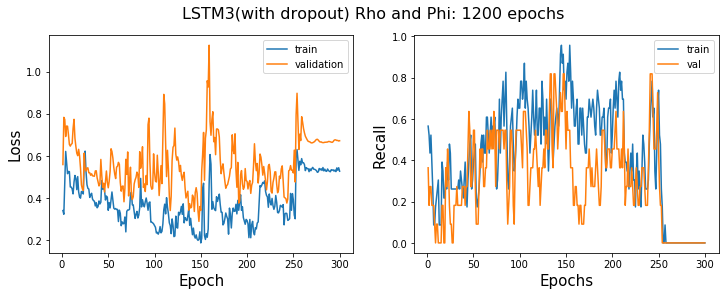

In [38]:
lr_plot(LSTM3_hist4,'LSTM3(with dropout) Rho and Phi: 1200 epochs','LSTM3_1200epochs.png')

Even though LSTM is very slowly getting a better score it is extremly eratic and the fitting time is significatly loger then the  1d CNN which already has a consistant score at 80% recall. I will leave this model how it stands and try out the last model. simple wavenet

**wavenet**

In [353]:
model_wave1 = Sequential()

model_wave1.add(keras.layers.InputLayer(input_shape=[None,2]))
for rate in (1,2,4,8) * 2:
    model_wave1.add(keras.layers.Conv1D(filters=20, kernel_size=2,activation='relu',padding='causal',dilation_rate=rate))
model_wave1.add(keras.layers.Conv1D(filters=10,kernel_size=1))
model_wave1.add(keras.layers.Conv1D(filters=1,kernel_size=1))
#model_wave1.add(Dense(1, activation='sigmoid'))

In [438]:
model_wave1 = Sequential()

model_wave1.add(Conv1D(filters=10, kernel_size=2, activation='relu', input_shape=(206,2)))
model_wave1.add(Conv1D(filters=20, kernel_size=2,activation='relu',padding='causal',dilation_rate=1))
model_wave1.add(Conv1D(filters=30, kernel_size=2,activation='relu',padding='causal',dilation_rate=2))
model_wave1.add(Conv1D(filters=40, kernel_size=2,activation='relu',padding='causal',dilation_rate=4))
model_wave1.add(Conv1D(filters=50, kernel_size=2,activation='relu',padding='causal',dilation_rate=8))
model_wave1.add(Conv1D(filters=20, kernel_size=2,activation='relu',padding='causal',dilation_rate=16))
model_wave1.add(Flatten())
model_wave1.add(Dense(1, activation='sigmoid'))

In [439]:
model_wave1.compile(loss='binary_crossentropy',optimizer='adam',metrics=metrics1)

In [440]:
model_wave1.summary()

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_494 (Conv1D)          (None, 205, 10)           50        
_________________________________________________________________
conv1d_495 (Conv1D)          (None, 205, 20)           420       
_________________________________________________________________
conv1d_496 (Conv1D)          (None, 205, 30)           1230      
_________________________________________________________________
conv1d_497 (Conv1D)          (None, 205, 40)           2440      
_________________________________________________________________
conv1d_498 (Conv1D)          (None, 205, 50)           4050      
_________________________________________________________________
conv1d_499 (Conv1D)          (None, 205, 20)           2020      
_________________________________________________________________
flatten_21 (Flatten)         (None, 4100)            

***NOTE: the best SimpleWave has been saved below so you can reload as appoes to re fitting the model***

In [441]:
wave1_hist = model_wave1.fit(X_train_rhophi,y_train_rhophi, epochs=300, validation_data=(X_vali_rhophi,y_vali_rhophi))

Epoch 1/300
4/4 [==============================] - 1s 150ms/step - loss: 0.6593 - accuracy: 0.5980 - true_positives: 7.0000 - true_negatives: 54.0000 - false_positives: 25.0000 - false_negatives: 16.0000 - precision: 0.2188 - recall: 0.3043 - val_loss: 0.6286 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/300
4/4 [==============================] - 0s 18ms/step - loss: 0.5287 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.7069 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/300
4/4 [==============================] - 0s 19ms

4/4 [==============================] - 0s 15ms/step - loss: 0.0304 - accuracy: 0.9902 - true_positives: 22.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 1.0000 - precision: 1.0000 - recall: 0.9565 - val_loss: 0.2033 - val_accuracy: 0.8857 - val_true_positives: 8.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 3.0000 - val_precision: 0.8889 - val_recall: 0.7273
Epoch 37/300
4/4 [==============================] - 0s 20ms/step - loss: 0.0216 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1151 - val_accuracy: 0.9714 - val_true_positives: 11.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 0.0000e+00 - val_precision: 0.9167 - val_recall: 1.0000
Epoch 38/300
4/4 [==============================] - 0s 19ms/step - loss: 0.0225 - accuracy: 1.0000 - tru

4/4 [==============================] - 0s 15ms/step - loss: 0.0015 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1292 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 73/300
4/4 [==============================] - 0s 14ms/step - loss: 0.0013 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1462 - val_accuracy: 0.9143 - val_true_positives: 9.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 2.0000 - val_precision: 0.9000 - val_recall: 0.8182
Epoch 74/300
4/4 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 1.0000 - tru

Epoch 90/300
4/4 [==============================] - 0s 17ms/step - loss: 7.5554e-04 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1485 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 91/300
4/4 [==============================] - 0s 15ms/step - loss: 7.2836e-04 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1511 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 92/300
4/4 [==============================] - 0s 15ms/step - loss: 7.1653e-0

Epoch 108/300
4/4 [==============================] - 0s 16ms/step - loss: 5.3800e-04 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1502 - val_accuracy: 0.9143 - val_true_positives: 9.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 2.0000 - val_precision: 0.9000 - val_recall: 0.8182
Epoch 109/300
4/4 [==============================] - 0s 16ms/step - loss: 4.7695e-04 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1410 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 110/300
4/4 [==============================] - 0s 15ms/step - loss: 4.6805e

Epoch 126/300
4/4 [==============================] - 0s 15ms/step - loss: 3.3480e-04 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1305 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 127/300
4/4 [==============================] - 0s 15ms/step - loss: 3.2468e-04 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1368 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 128/300
4/4 [==============================] - 0s 15ms/step - loss: 3.2765

Epoch 144/300
4/4 [==============================] - 0s 15ms/step - loss: 2.4401e-04 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1262 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 145/300
4/4 [==============================] - 0s 15ms/step - loss: 2.2276e-04 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1381 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 146/300
4/4 [==============================] - 0s 15ms/step - loss: 2.4579

Epoch 162/300
4/4 [==============================] - 0s 14ms/step - loss: 1.7772e-04 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1220 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 163/300
4/4 [==============================] - 0s 16ms/step - loss: 1.7299e-04 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1233 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 164/300
4/4 [==============================] - 0s 15ms/step - loss: 1.6954

Epoch 180/300
4/4 [==============================] - 0s 16ms/step - loss: 1.3641e-04 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1186 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 181/300
4/4 [==============================] - 0s 16ms/step - loss: 1.3390e-04 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1168 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 182/300
4/4 [==============================] - 0s 15ms/step - loss: 1.3111

Epoch 198/300
4/4 [==============================] - 0s 15ms/step - loss: 1.0413e-04 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1159 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 199/300
4/4 [==============================] - 0s 16ms/step - loss: 1.0831e-04 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1160 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 200/300
4/4 [==============================] - 0s 15ms/step - loss: 1.0165

Epoch 216/300
4/4 [==============================] - 0s 16ms/step - loss: 8.5571e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1130 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 217/300
4/4 [==============================] - 0s 15ms/step - loss: 8.4187e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1109 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 218/300
4/4 [==============================] - 0s 15ms/step - loss: 8.2892

Epoch 234/300
4/4 [==============================] - 0s 16ms/step - loss: 6.8228e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1052 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 235/300
4/4 [==============================] - 0s 16ms/step - loss: 6.5571e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1008 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 236/300
4/4 [==============================] - 0s 15ms/step - loss: 7.8298

Epoch 252/300
4/4 [==============================] - 0s 15ms/step - loss: 5.7772e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0982 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 253/300
4/4 [==============================] - 0s 15ms/step - loss: 5.7632e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1011 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 254/300
4/4 [==============================] - 0s 15ms/step - loss: 5.4759

Epoch 270/300
4/4 [==============================] - 0s 15ms/step - loss: 4.5790e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0948 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 271/300
4/4 [==============================] - 0s 15ms/step - loss: 4.5479e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0946 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 272/300
4/4 [==============================] - 0s 15ms/step - loss: 4.5056

Epoch 288/300
4/4 [==============================] - 0s 16ms/step - loss: 3.9033e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0921 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 289/300
4/4 [==============================] - 0s 16ms/step - loss: 3.8518e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0915 - val_accuracy: 0.9429 - val_true_positives: 10.0000 - val_true_negatives: 23.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 290/300
4/4 [==============================] - 0s 16ms/step - loss: 3.7989

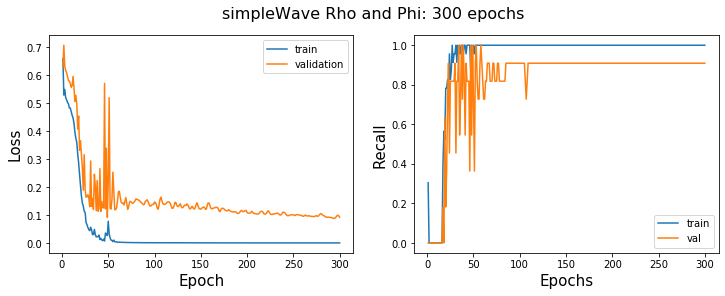

In [442]:
lr_plot(wave1_hist,'simpleWave Rho and Phi: 300 epochs','simpleWave_300epochs_2.png')

In [445]:
model_wave1.save('../models/simpleWave.h5')

In [311]:
wave_hist = model_wave1.fit(X_train_rhophi,y_train_rhophi, epochs=300, validation_data=(X_vali_rhophi,y_vali_rhophi))


In [416]:
model_wave2 = Sequential()

model_wave2.add(Conv1D(filters=10, kernel_size=2, activation='relu', input_shape=(206,2)))
model_wave2.add(Conv1D(filters=20, kernel_size=2,activation='relu',padding='causal',dilation_rate=1))
model_wave2.add(Conv1D(filters=30, kernel_size=2,activation='relu',padding='causal',dilation_rate=2))
model_wave2.add(Conv1D(filters=40, kernel_size=2,activation='relu',padding='causal',dilation_rate=4))
model_wave2.add(Conv1D(filters=50, kernel_size=2,activation='relu',padding='causal',dilation_rate=8))
model_wave2.add(Conv1D(filters=20, kernel_size=2,activation='relu',padding='causal',dilation_rate=1))
model_wave2.add(Conv1D(filters=30, kernel_size=2,activation='relu',padding='causal',dilation_rate=2))
model_wave2.add(Conv1D(filters=40, kernel_size=2,activation='relu',padding='causal',dilation_rate=4))
model_wave2.add(Conv1D(filters=50, kernel_size=2,activation='relu',padding='causal',dilation_rate=8))
model_wave2.add(keras.layers.Conv1D(filters=1, kernel_size=2,activation='relu',input_shape=(206,2)))
model_wave2.add(Flatten())
model_wave2.add(Dense(1, activation='sigmoid'))

In [418]:
model_wave2.compile(loss='binary_crossentropy',optimizer='adam',metrics=metrics1)

In [419]:
wave2_hist = model_wave2.fit(X_train_rhophi,y_train_rhophi, epochs=300, validation_data=(X_vali_rhophi,y_vali_rhophi))

Epoch 1/300
4/4 [==============================] - 1s 178ms/step - loss: 0.6920 - accuracy: 0.6667 - true_positives: 6.0000 - true_negatives: 62.0000 - false_positives: 17.0000 - false_negatives: 17.0000 - precision: 0.2609 - recall: 0.2609 - val_loss: 0.6881 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/300
4/4 [==============================] - 0s 31ms/step - loss: 0.6796 - accuracy: 0.7745 - true_positives: 0.0000e+00 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 23.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6676 - val_accuracy: 0.6857 - val_true_positives: 0.0000e+00 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 11.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/300
4/4 [==============================] - 0s 27ms

Epoch 36/300
4/4 [==============================] - 0s 23ms/step - loss: 0.2195 - accuracy: 0.9706 - true_positives: 20.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 3.0000 - precision: 1.0000 - recall: 0.8696 - val_loss: 0.7035 - val_accuracy: 0.7143 - val_true_positives: 1.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 10.0000 - val_precision: 1.0000 - val_recall: 0.0909
Epoch 37/300
4/4 [==============================] - 0s 27ms/step - loss: 0.2106 - accuracy: 0.8725 - true_positives: 10.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 13.0000 - precision: 1.0000 - recall: 0.4348 - val_loss: 0.2887 - val_accuracy: 0.8571 - val_true_positives: 6.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 5.0000 - val_precision: 1.0000 - val_recall: 0.5455
Epoch 38/300
4/4 [==============================] - 0s 23ms/step - loss: 0.2250 - accuracy

4/4 [==============================] - 0s 24ms/step - loss: 0.1372 - accuracy: 0.9902 - true_positives: 22.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 1.0000 - precision: 1.0000 - recall: 0.9565 - val_loss: 0.4020 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 73/300
4/4 [==============================] - 0s 23ms/step - loss: 0.1348 - accuracy: 0.9902 - true_positives: 22.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 1.0000 - precision: 1.0000 - recall: 0.9565 - val_loss: 0.5321 - val_accuracy: 0.7429 - val_true_positives: 2.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 9.0000 - val_precision: 1.0000 - val_recall: 0.1818
Epoch 74/300
4/4 [==============================] - 0s 24ms/step - loss: 0.1340 - accuracy: 0.9902 - true

Epoch 108/300
4/4 [==============================] - 0s 24ms/step - loss: 0.1006 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.7614 - val_accuracy: 0.8000 - val_true_positives: 4.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 7.0000 - val_precision: 1.0000 - val_recall: 0.3636
Epoch 109/300
4/4 [==============================] - 0s 24ms/step - loss: 0.0935 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.7525 - val_accuracy: 0.8000 - val_true_positives: 4.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 7.0000 - val_precision: 1.0000 - val_recall: 0.3636
Epoch 110/300
4/4 [==============================] - 0s 24ms/step - loss: 0.0901 -

Epoch 126/300
4/4 [==============================] - 0s 25ms/step - loss: 0.0365 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.2634 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 127/300
4/4 [==============================] - 0s 24ms/step - loss: 0.0325 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.5066 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 128/300
4/4 [==============================] - 0s 25ms/step - loss: 0.0308 -

Epoch 144/300
4/4 [==============================] - 0s 28ms/step - loss: 8.6484e-04 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.6444 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 145/300
4/4 [==============================] - 0s 25ms/step - loss: 7.5280e-04 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.6864 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 146/300
4/4 [==============================] - 0s 24ms/step - loss: 

Epoch 162/300
4/4 [==============================] - 0s 27ms/step - loss: 1.4235e-04 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.9895 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 163/300
4/4 [==============================] - 0s 31ms/step - loss: 1.4061e-04 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.9888 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 164/300
4/4 [==============================] - 0s 30ms/step - loss: 

Epoch 180/300
4/4 [==============================] - 0s 28ms/step - loss: 7.4165e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.1895 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 181/300
4/4 [==============================] - 0s 27ms/step - loss: 7.1783e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.2101 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 182/300
4/4 [==============================] - 0s 26ms/step - loss: 

Epoch 198/300
4/4 [==============================] - 0s 27ms/step - loss: 4.7624e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.3169 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 199/300
4/4 [==============================] - 0s 26ms/step - loss: 4.6584e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.3280 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 200/300
4/4 [==============================] - 0s 28ms/step - loss: 

Epoch 216/300
4/4 [==============================] - 0s 27ms/step - loss: 3.5975e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.3964 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 217/300
4/4 [==============================] - 0s 32ms/step - loss: 3.3890e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.4194 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 218/300
4/4 [==============================] - 0s 34ms/step - loss: 

Epoch 234/300
4/4 [==============================] - 0s 32ms/step - loss: 2.6195e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.4780 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 235/300
4/4 [==============================] - 0s 31ms/step - loss: 2.5658e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.4831 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 236/300
4/4 [==============================] - 0s 31ms/step - loss: 

Epoch 252/300
4/4 [==============================] - 0s 34ms/step - loss: 2.0474e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.5675 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 253/300
4/4 [==============================] - 0s 28ms/step - loss: 2.0156e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.5661 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 254/300
4/4 [==============================] - 0s 27ms/step - loss: 

Epoch 270/300
4/4 [==============================] - 0s 30ms/step - loss: 1.7577e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.5800 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 271/300
4/4 [==============================] - 0s 27ms/step - loss: 1.7405e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.5857 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 272/300
4/4 [==============================] - 0s 26ms/step - loss: 

Epoch 288/300
4/4 [==============================] - 0s 34ms/step - loss: 1.4298e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.6424 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 289/300
4/4 [==============================] - 0s 31ms/step - loss: 1.4153e-05 - accuracy: 1.0000 - true_positives: 23.0000 - true_negatives: 79.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_loss: 3.6507 - val_accuracy: 0.7714 - val_true_positives: 3.0000 - val_true_negatives: 24.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 8.0000 - val_precision: 1.0000 - val_recall: 0.2727
Epoch 290/300
4/4 [==============================] - 0s 30ms/step - loss: 

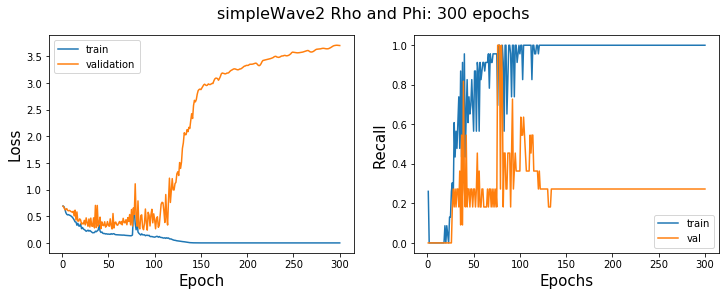

In [421]:
lr_plot(wave2_hist,'simpleWave2 Rho and Phi: 300 epochs','simpleWave2_300epochs.png')

**my first simpleWave seems to be the best out of all my classification models. Lets predict with it and see a confusion matrix!**

In [39]:
# grabbing hold out data
holdout_raw,meta = arff.loadarff('../data/Epilepsy_TEST.arff')

In [40]:
holdout_pd = pd.DataFrame(holdout_raw)

In [41]:
holdout_pd['label_binary'] = np.where(holdout_pd['activity']==b'EPILEPSY',1,0)

In [42]:
rho_phi = df_to_rho_phi(holdout_pd)

../src/HAR_functions.py:37: RuntimeWarning: divide by zero encountered in true_divide
  


In [43]:
rho_phi.shape

(138, 206, 2)

In [44]:
y_hold = holdout_pd['label_binary'].values

In [47]:
model_wave1 = keras.models.load_model('../models/simpleWave.h5')

In [48]:
simpleWave_pred_proba = model_wave1.predict_proba(rho_phi)

Instructions for updating:
Please use `model.predict()` instead.


In [49]:
simpleWave_pred = model_wave1.predict(rho_phi)

In [463]:
holdout_results = model_wave1.evaluate(rho_phi,y_hold)

5/5 [==============================] - 0s 7ms/step - loss: 0.2304 - accuracy: 0.9203 - true_positives: 25.0000 - true_negatives: 102.0000 - false_positives: 2.0000 - false_negatives: 9.0000 - precision: 0.9259 - recall: 0.7353  


In [464]:
holdout_results

[0.23036892712116241,
 0.9202898740768433,
 25.0,
 102.0,
 2.0,
 9.0,
 0.9259259104728699,
 0.7352941036224365]

In [467]:
metrics1 = ['loss']+metrics1

In [474]:
eval_ = {}
for k,val in zip(metrics1,holdout_results):
    eval_[k] = val

In [475]:
eval_ 

{'loss': 0.23036892712116241,
 'accuracy': 0.9202898740768433,
 'TruePositives': 25.0,
 'TrueNegatives': 102.0,
 'FalsePositives': 2.0,
 'FalseNegatives': 9.0,
 'Precision': 0.9259259104728699,
 'Recall': 0.7352941036224365}

In [476]:
cm = np.array([[25.0, 2.0],[9.0,102.0]])
# [[tp,fp],[fn,tn]]

In [479]:
cm_percents = cm/(25+2+9+102)

''

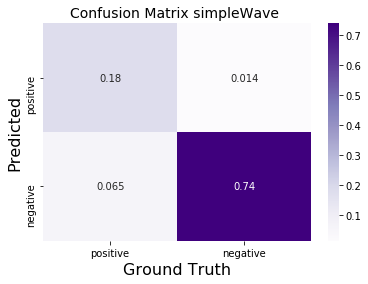

In [482]:
import seaborn as sns

sns.heatmap(cm_percents,annot=True,cmap='Purples')
plt.xticks([.5,1.5],['positive','negative'])
plt.xlabel('Ground Truth',size=16)
plt.yticks([.5,1.5],['positive','negative'])
plt.ylabel('Predicted',size=16)
plt.title('Confusion Matrix simpleWave ',size=14)
#plt.savefig('../images/cm_simpleWave.png')
;

In [483]:
#actual percentage of positives in hold out data
len(y_hold[y_hold==1])/len(y_hold)

0.2463768115942029

In [484]:
len(y_hold[y_hold==0])/len(y_hold)

0.7536231884057971

**Check out the ROC curve**

In [ ]:
from sklearn.metrics import roc_curve

In [152]:
proba = model_wave1.predict_proba(rho_phi)

**roc for best models**

In [176]:
model_CNN1d = keras.models.load_model('../models/CNN1d.h5')

In [177]:
proba2 = model_CNN1d.predict_proba(rho_phi)

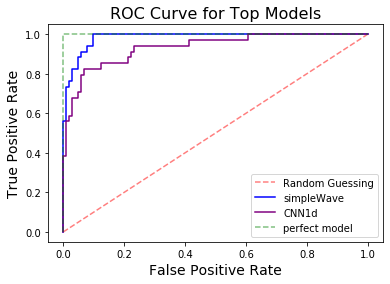

In [244]:
ROC(y_hold,proba,proba2,'simpleWave', 'CNN1d')

**explore thresholds**

In [197]:
model_d = {'simpleWave':model_wave1, '1D CNN':model_CNN1d}

Price of False Positive:-5
Price of False Negative:0
Price of True Positive:95
Price of True Negative:0


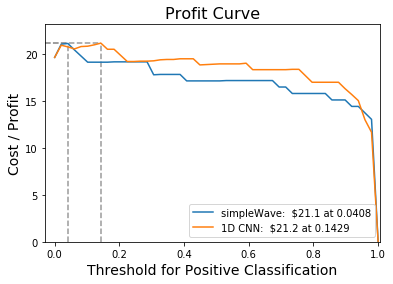

In [253]:
profit_thresh = profit_curve(model_d,rho_phi,y_hold)


In [45]:
#simpleWave = keras.models.load_model('../models/simpleWave.h5')

**checking out the precision recall curve**

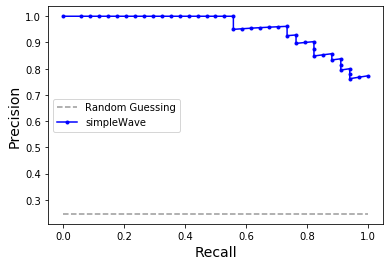

In [167]:
precision,recall,thresh = PRC(y_hold,proba)

**what does this mean . recall of 1 would mean , every single true seizure would be flagged as seizure(but you will probably get some false positives). precision of 1 would mean all predicted seizures are actually seizures (no false positives).**

**useing the f1 score to find optimal theshold**

In [168]:
from sklearn.metrics import f1_score
scores = [f1_score(y_hold,label_matrix(proba, t)) for t in thresh]  

In [169]:
best_score_idx = np.argmax(scores)

''

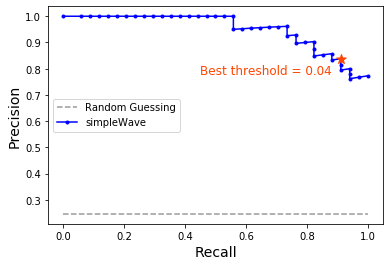

In [170]:
precision, recall, thresh=PRC(y_hold,proba)
plt.scatter(recall[best_score_idx],precision[best_score_idx],color='orangered',marker = '*',s=100,zorder=2.5)
best_thresh = thresh[best_score_idx]
s = f'Best threshold = {best_thresh:.2f}'
plt.text(.45,.78,s,color="orangered",fontsize=12)
#plt.savefig('../images/PR_curve.png')
;

**looking at the confusion matrix found with optimal f1 threshold**

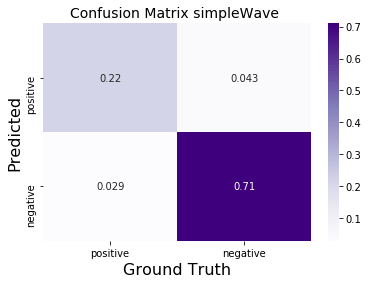

In [171]:
custom_cm(y_hold,proba,best_thresh,'best_cm1')

In [172]:
best_thresh

0.041348457

**Now lets look at a confusion matrix with custom theshold found from profit curve**

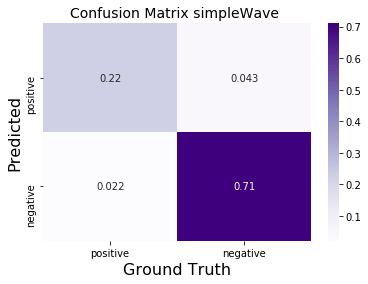

In [175]:
custom_cm(y_hold,proba,profit_thresh,'profit_cm1')

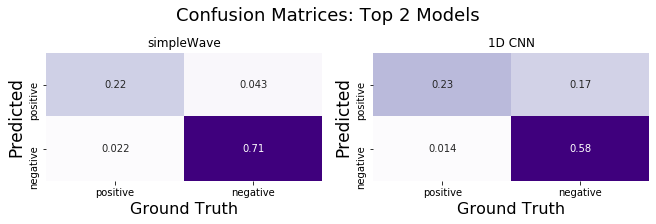

In [306]:

custom_cm2(y_hold,proba,proba2,.0408,.1429,'simpleWave','1D CNN')